## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost. 
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

from sklearn import metrics

# To impute missing values
from sklearn.impute import SimpleImputer

# To build different kind of models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To create pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline, make_pipeline

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading the dataset

In [ ]:
# Giving colab access to my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the dataset that will be used to train and validate different models
data = pd.read_csv('/content/drive/MyDrive/Curso_DA/Train.csv')

In [ ]:
# Reading the dataset that will be used to test the final model
test = pd.read_csv('/content/drive/MyDrive/Curso_DA/Test.csv')

## Data Overview

In [ ]:
# Having a glimpse of the data
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,...,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,...,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,...,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,...,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,...,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [ ]:
# Having a glimpse of the test set
test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,...,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,...,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,...,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,...,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,...,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


In [ ]:
# Checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns in the data.")
print("There are", test.shape[0], 'rows and', test.shape[1], "columns in the test set.")

There are 20000 rows and 41 columns in the data.
There are 5000 rows and 41 columns in the test set.


In [ ]:
# Checking the type of data and null values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

* We have 49 float type columns and 1 numerical column.
* There seem to be missing values.

In [ ]:
# Checking for duplicates
data.duplicated().sum()

0

* There are no duplicates in the data

In [ ]:
# Rechecking for missing values
data.isnull().sum()


V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

* There are 18 missing values for each of the first two columns.

In [ ]:
# Having a statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


* At first sight, several features have outliers. 
* 'V1' and 'V2' columns have very high maximum values. 'Mean' strategy for imputing their missing values could throw very atypical values. Median' strategy is the best choice. 

## Exploratory Data Analysis (EDA)

In [ ]:
# This function creates two subplots: a boxplot and a histogram plot
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# This function creates labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

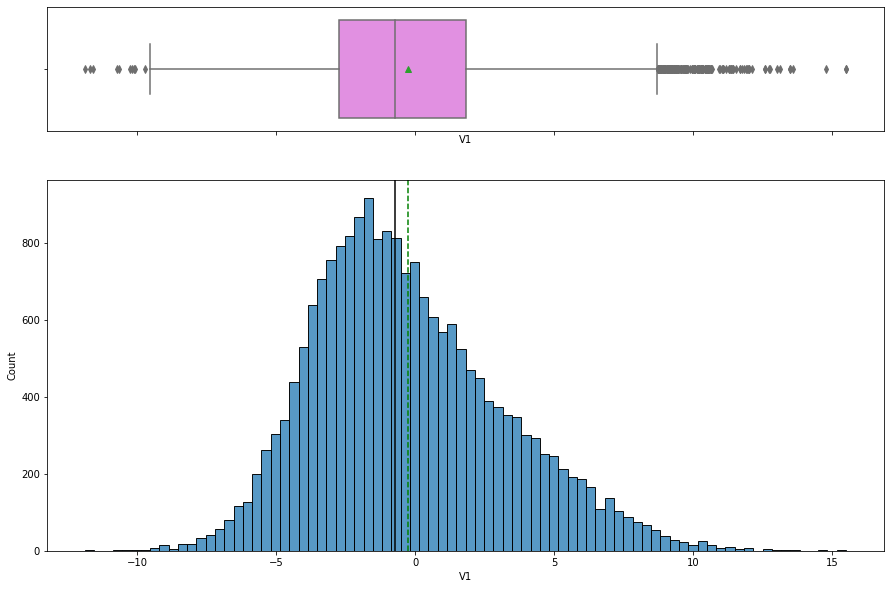

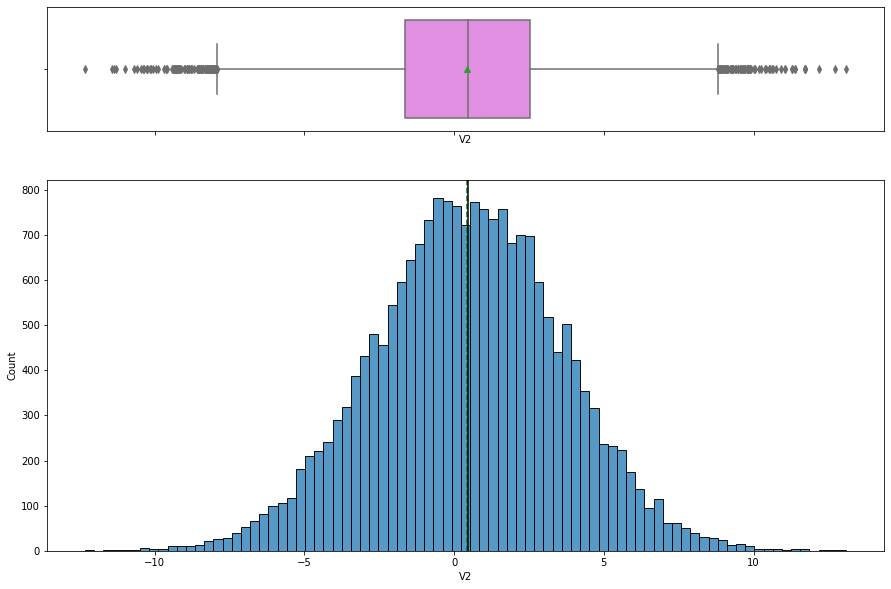

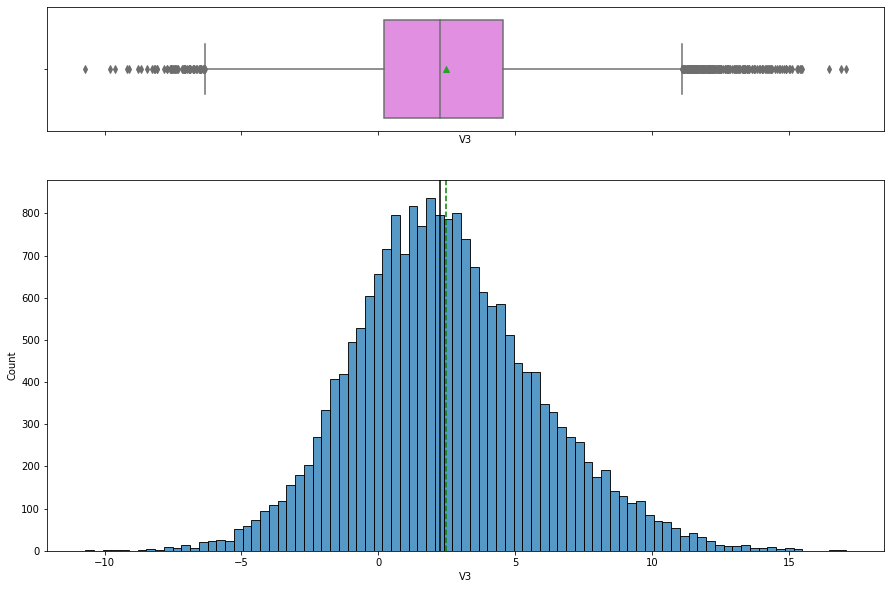

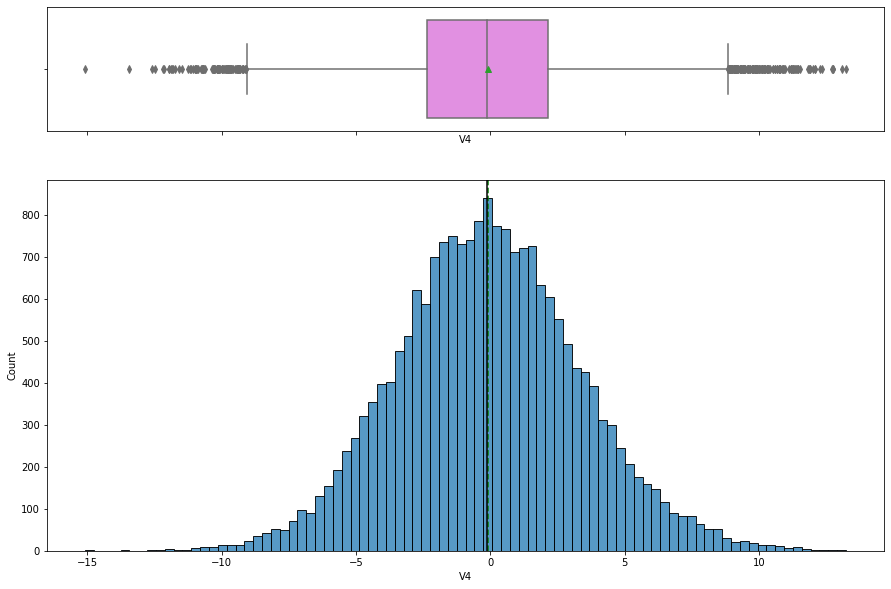

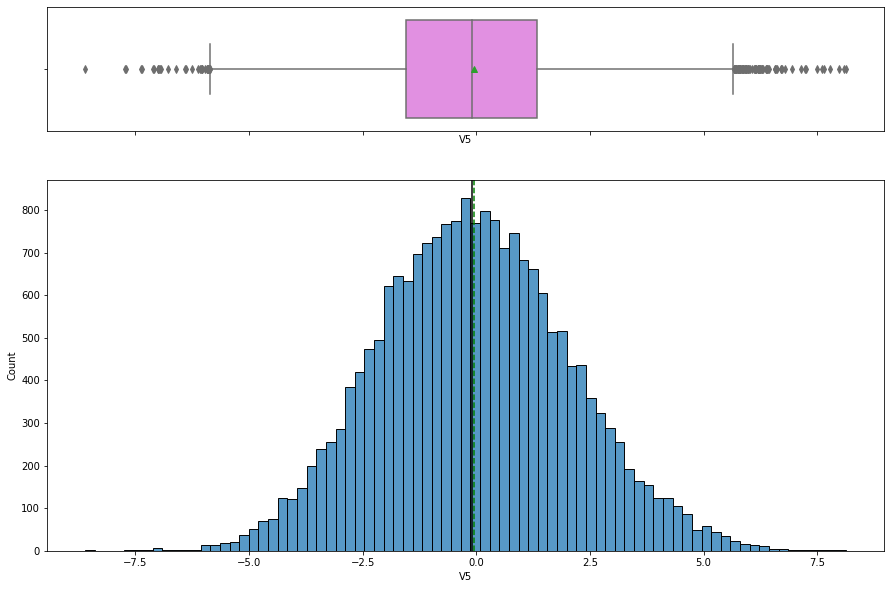

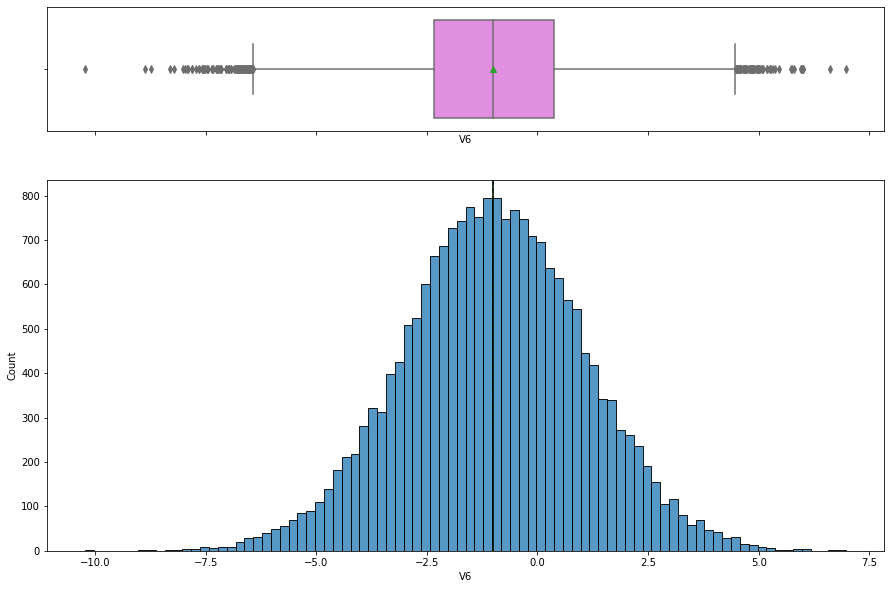

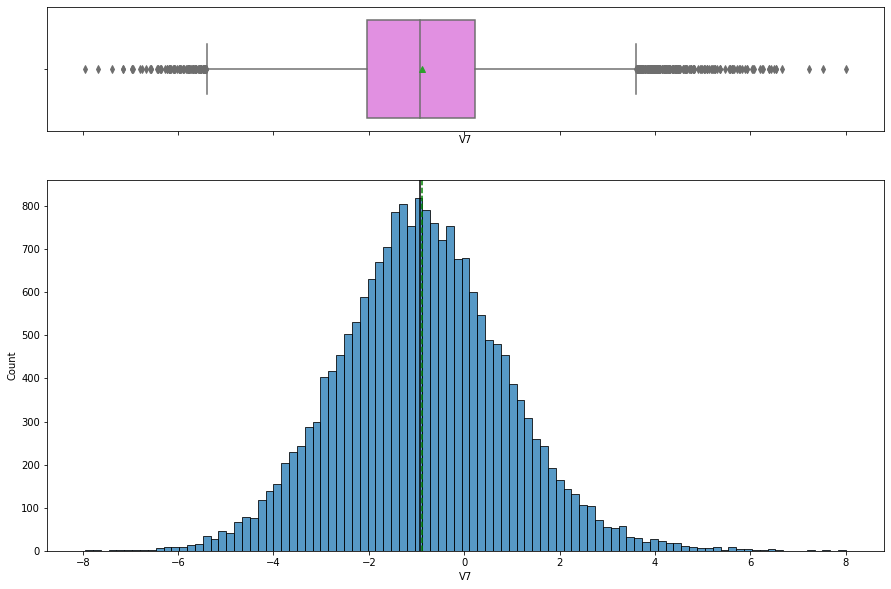

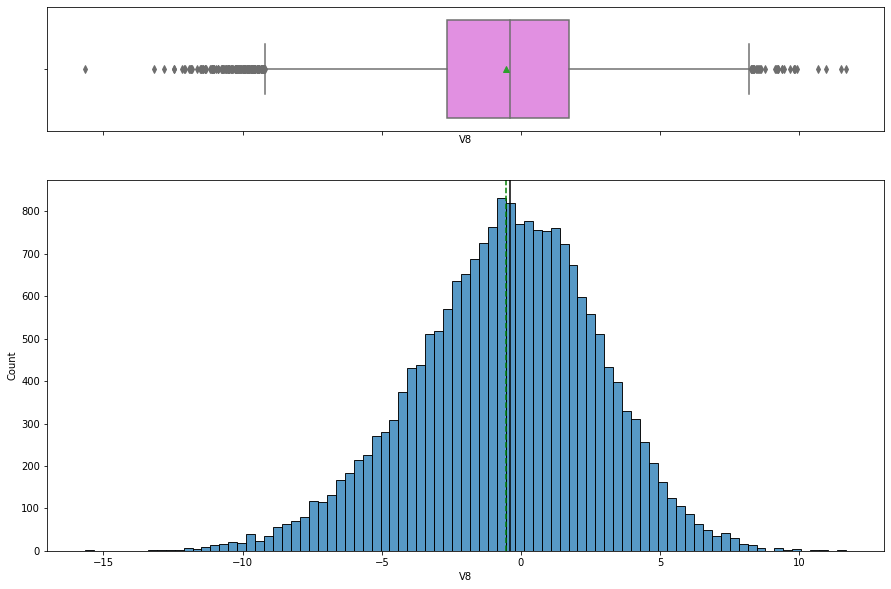

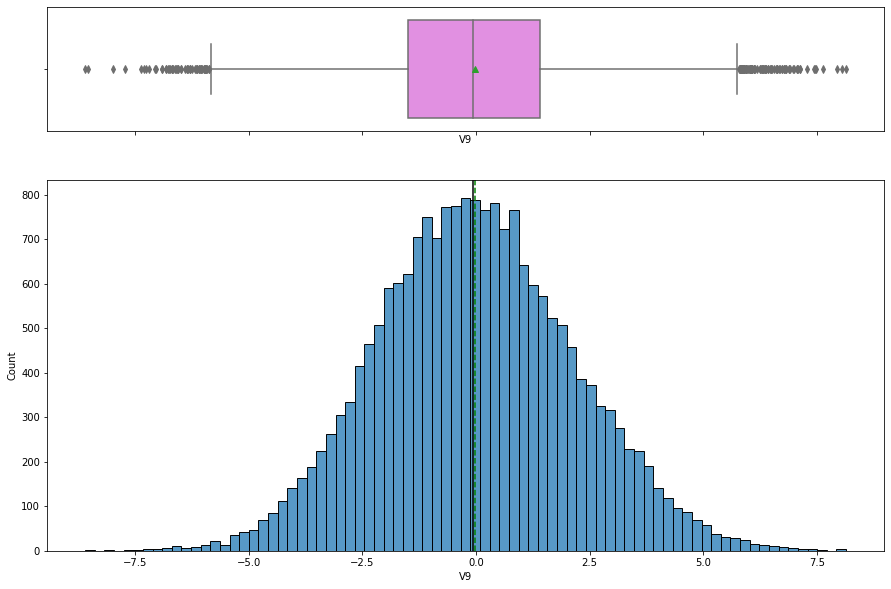

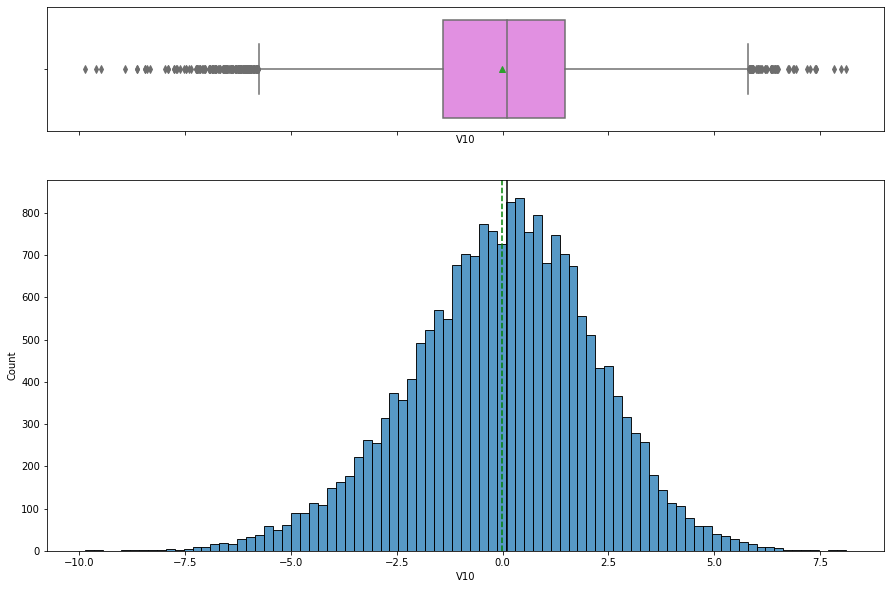

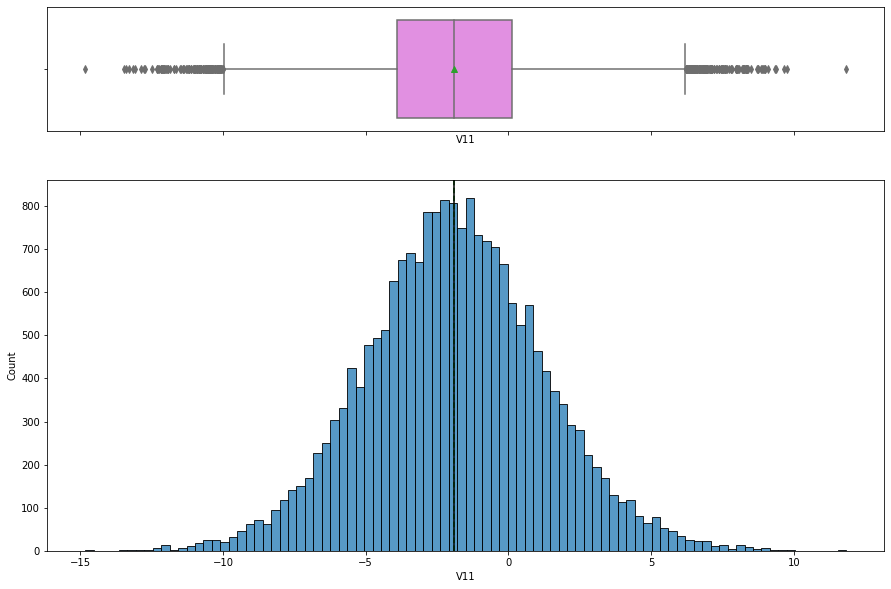

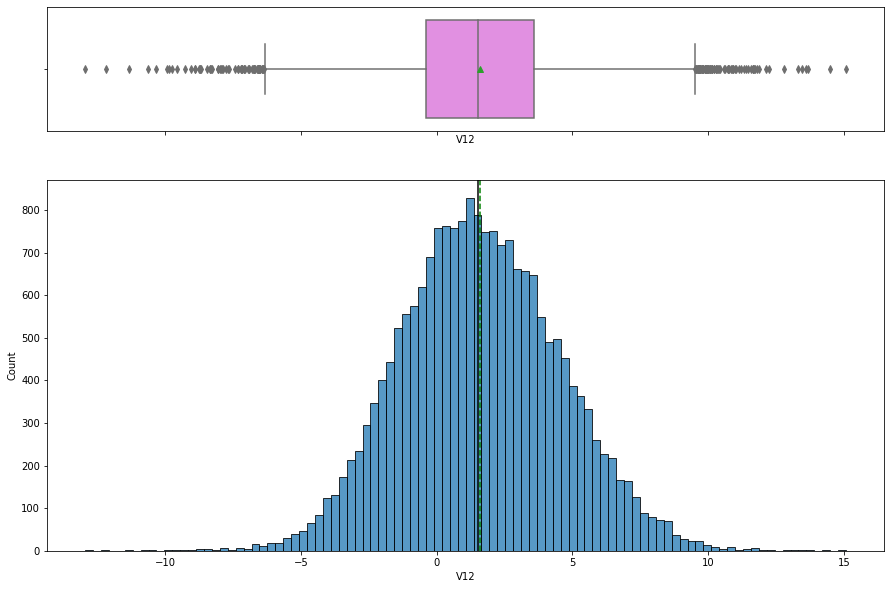

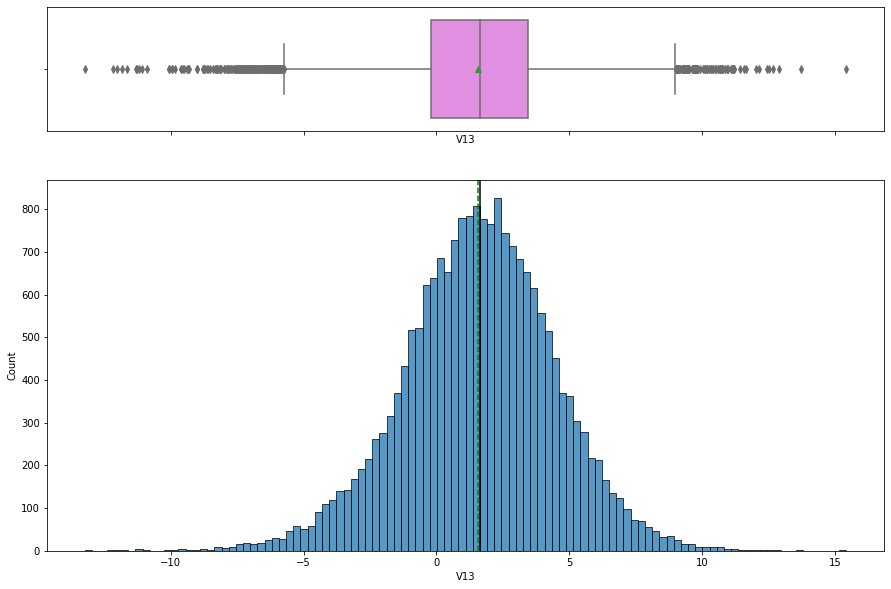

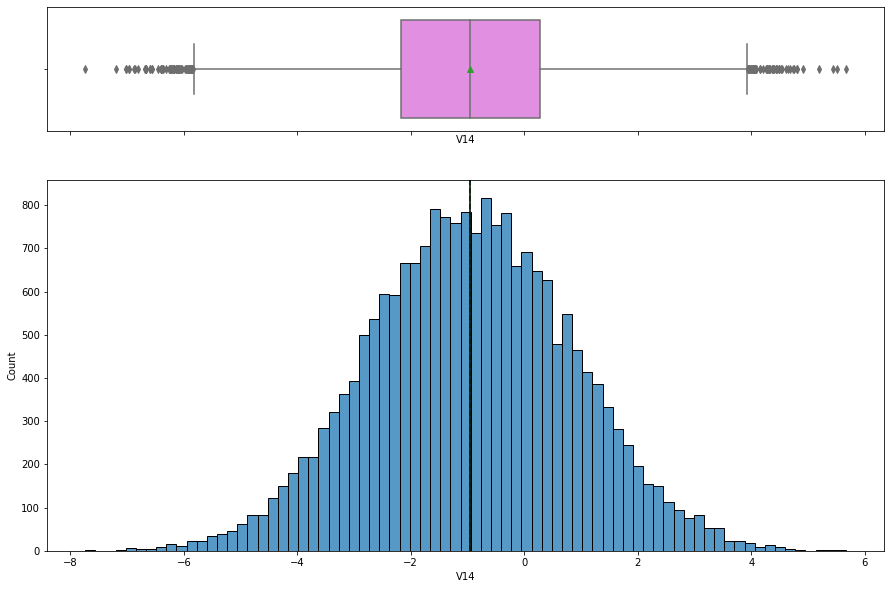

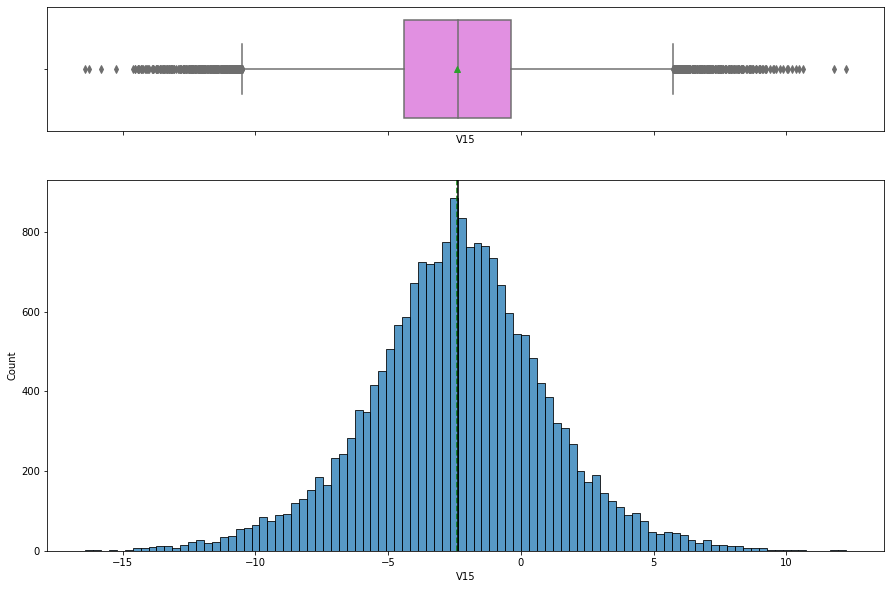

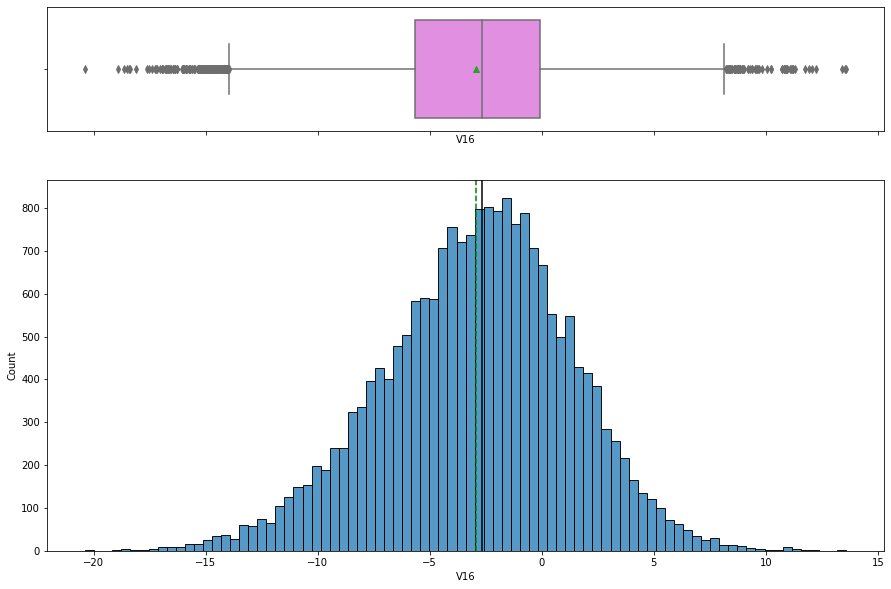

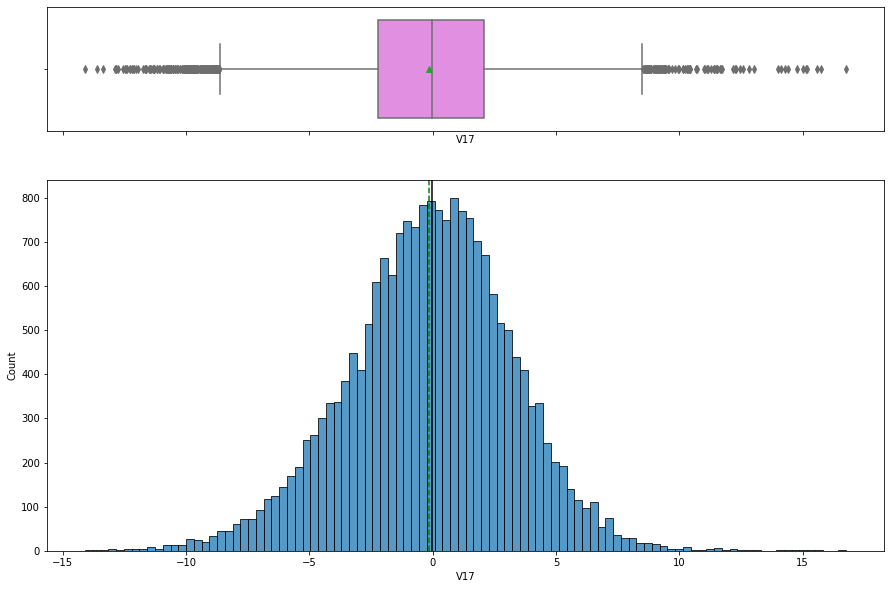

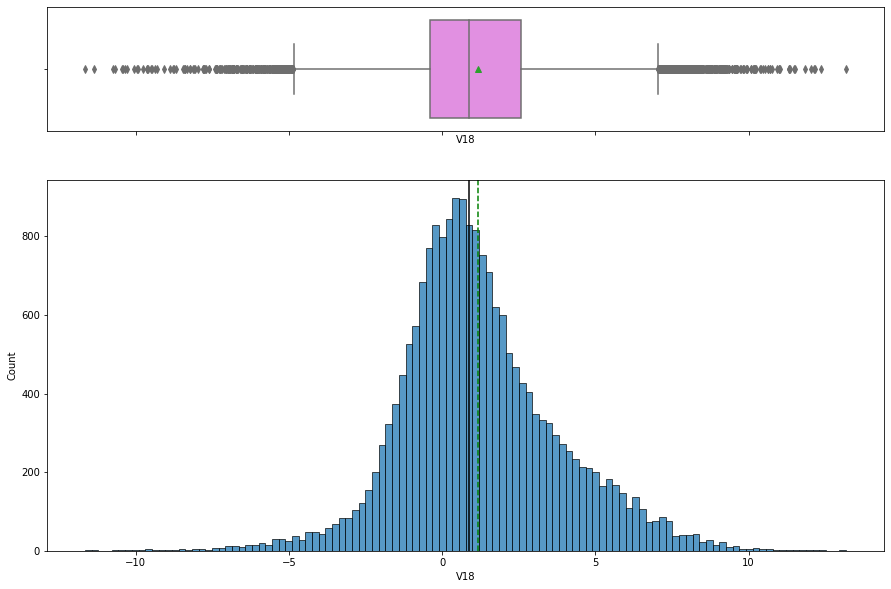

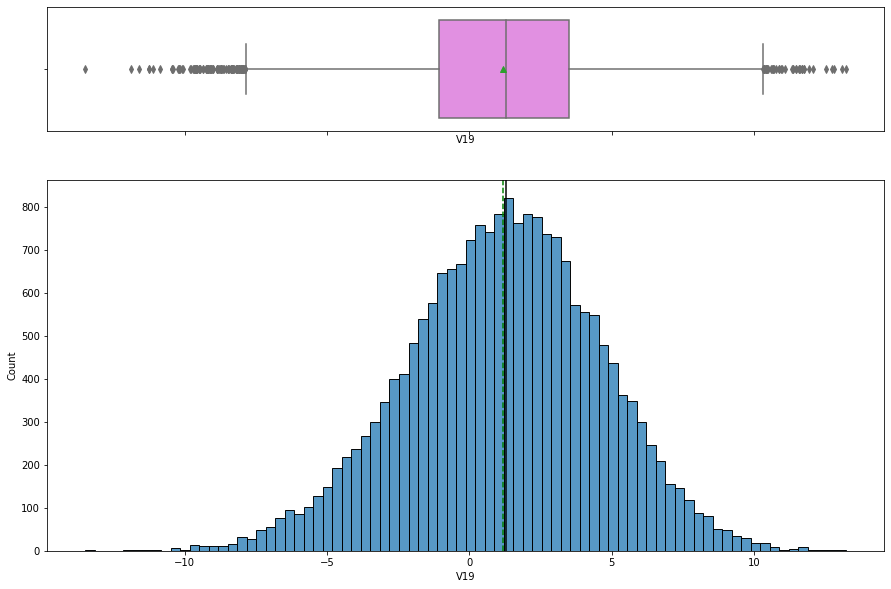

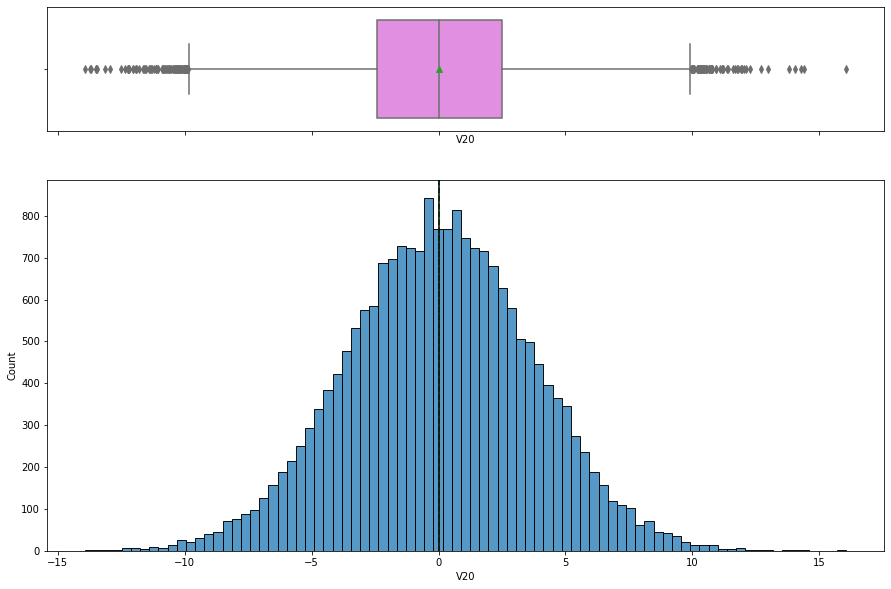

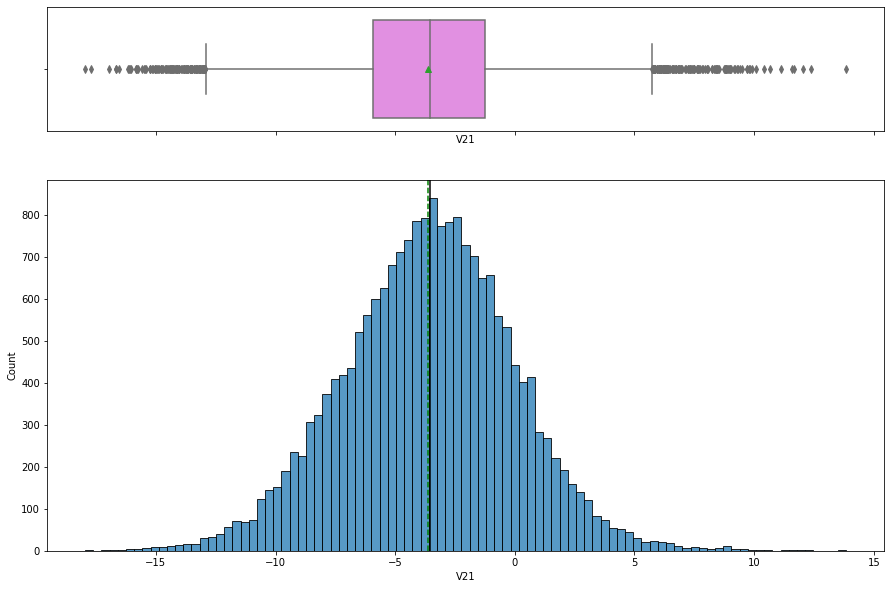

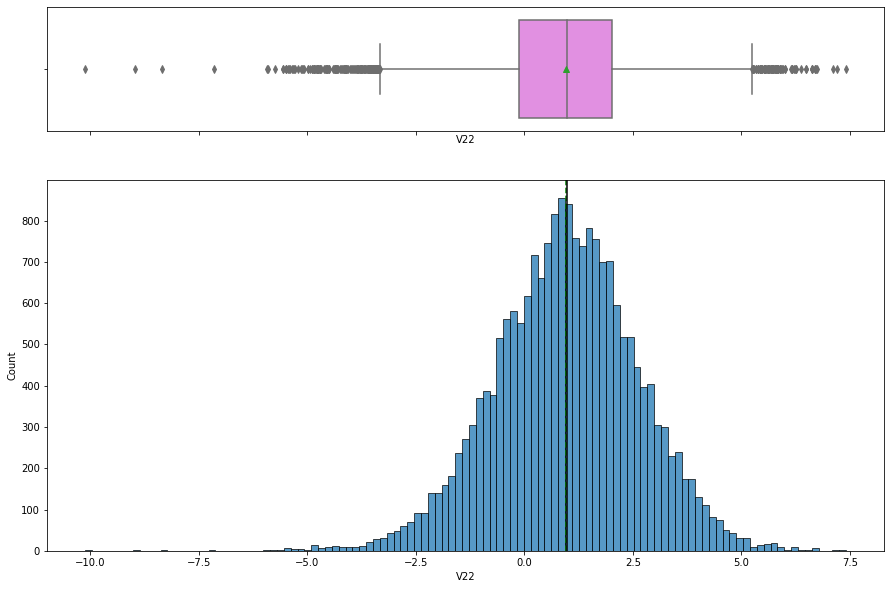

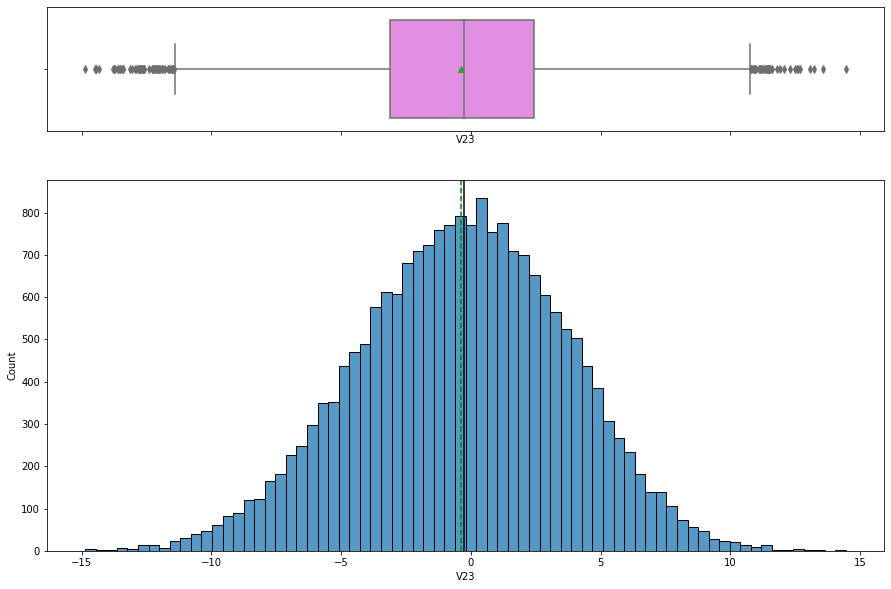

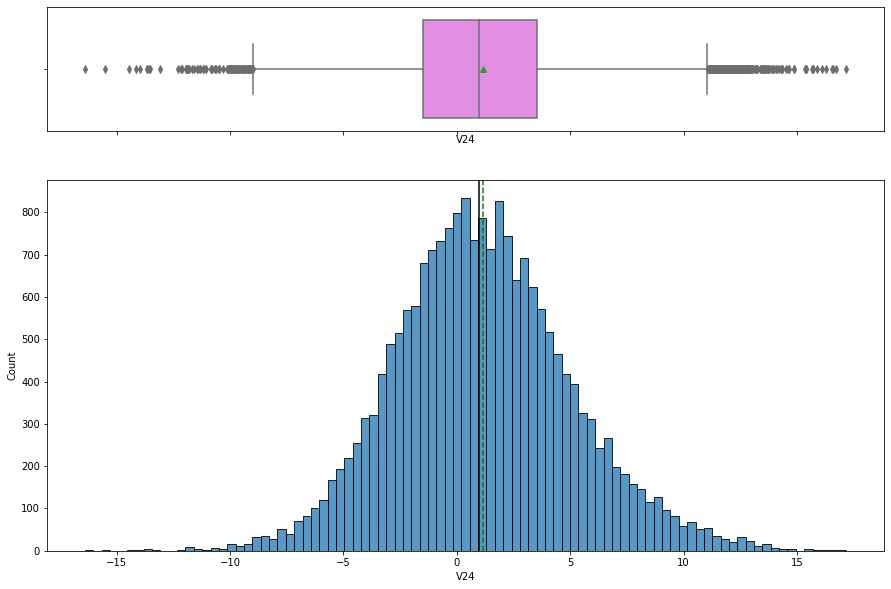

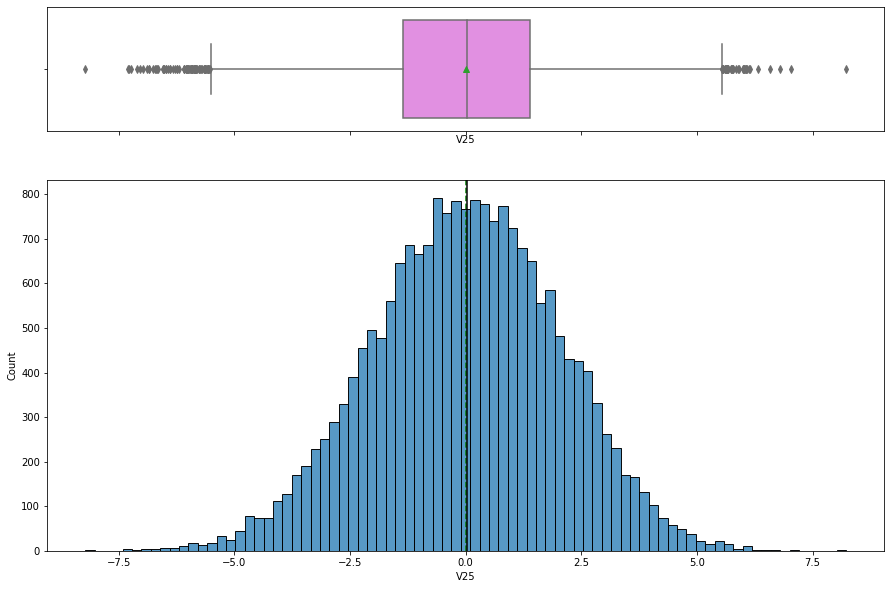

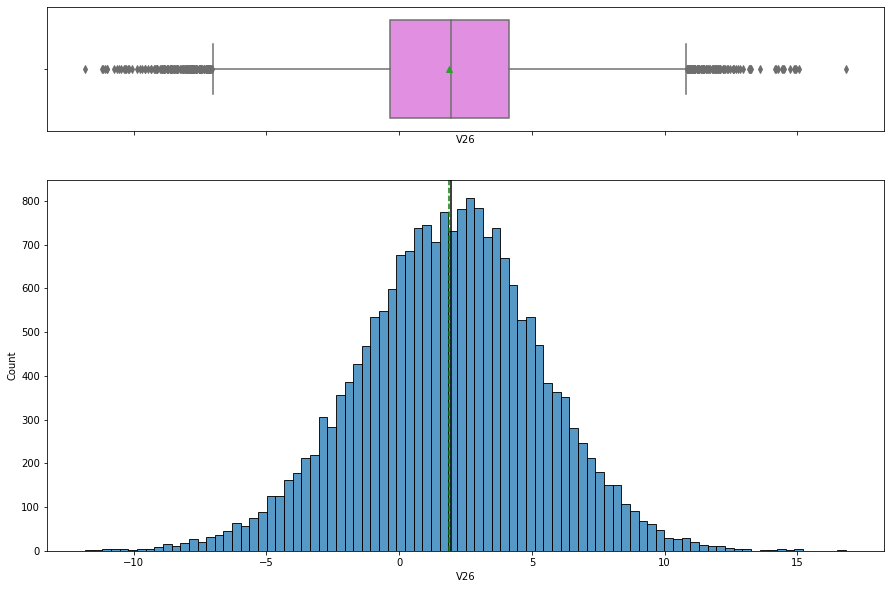

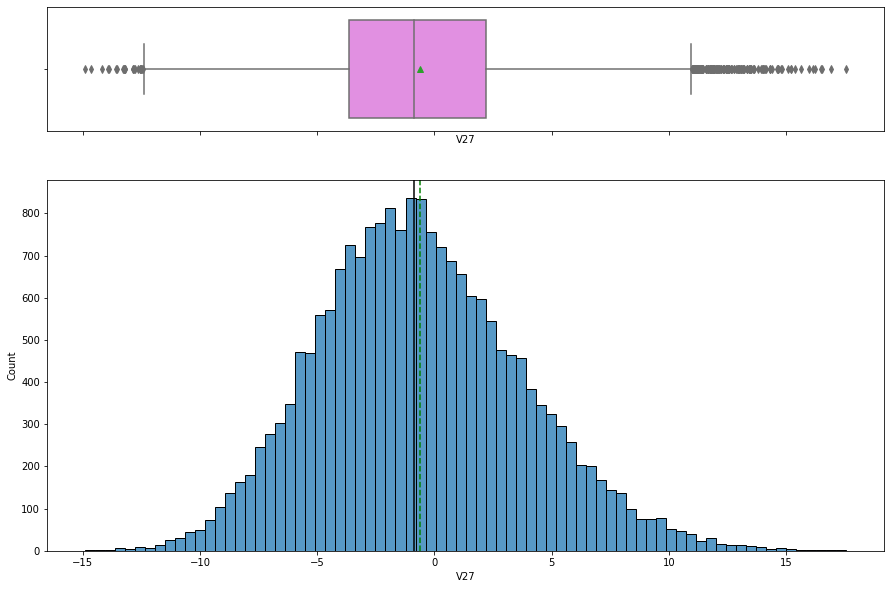

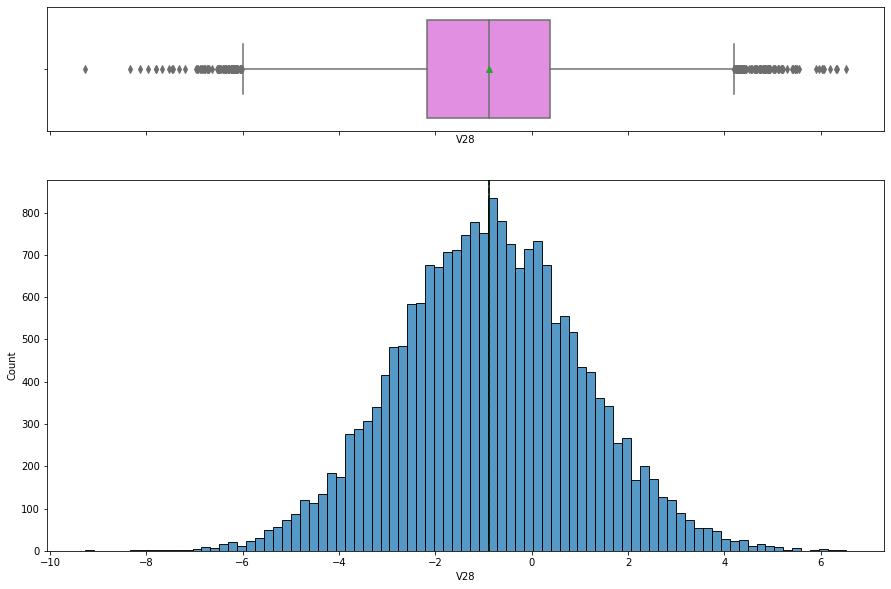

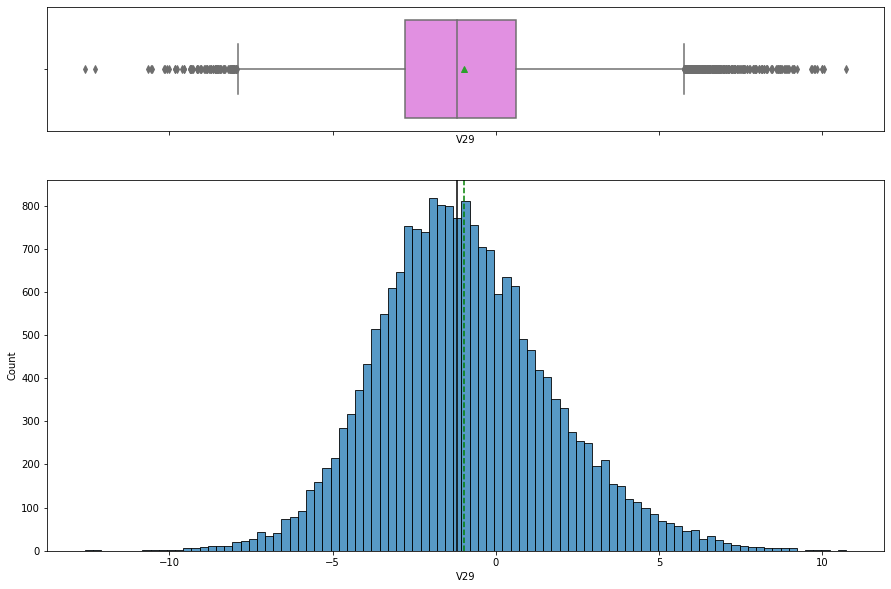

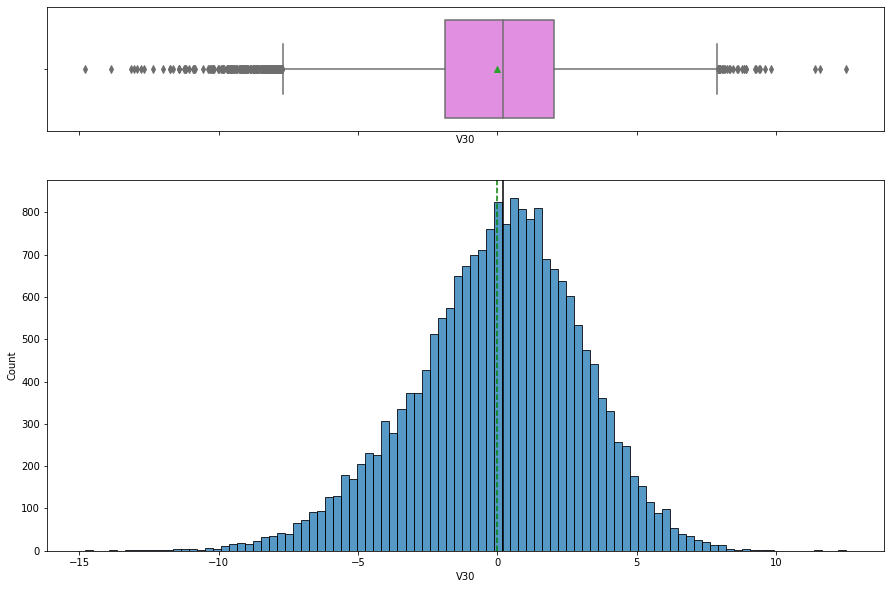

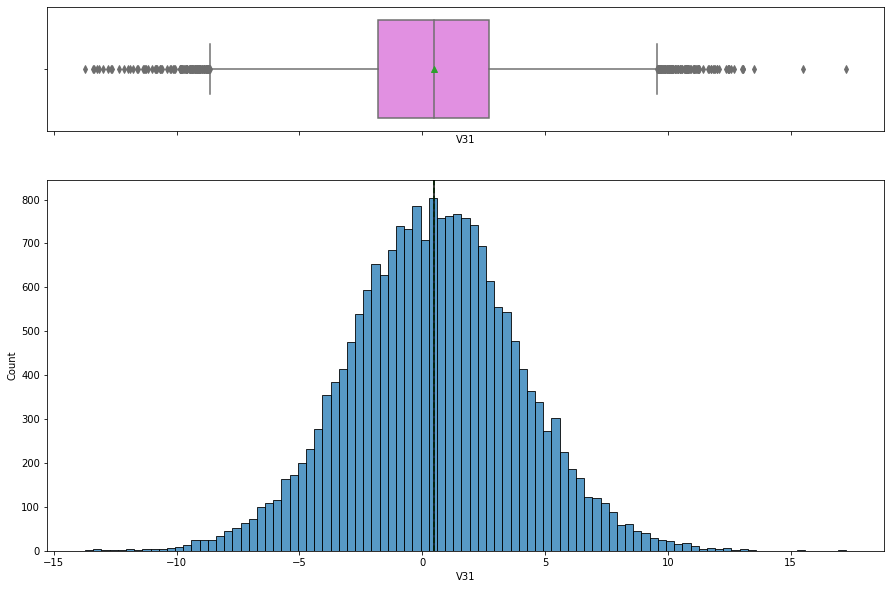

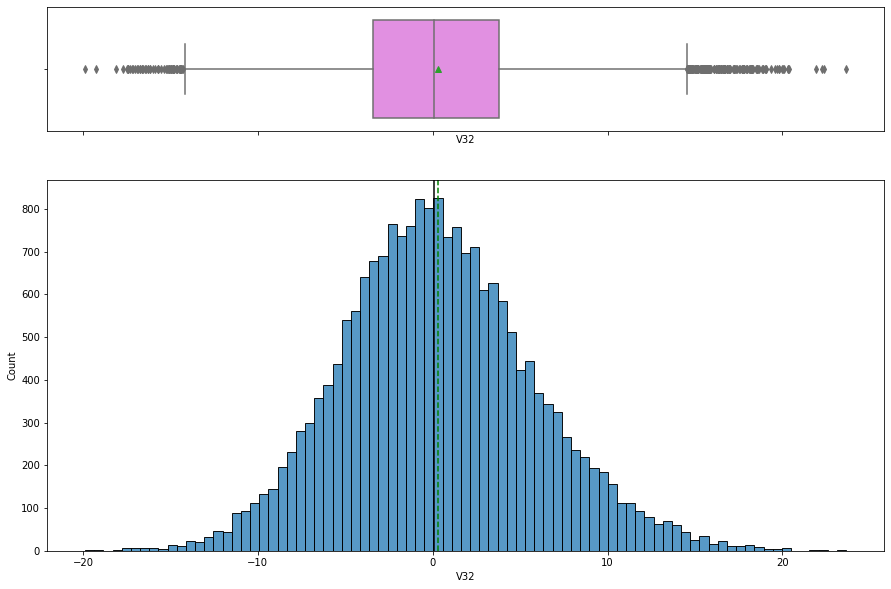

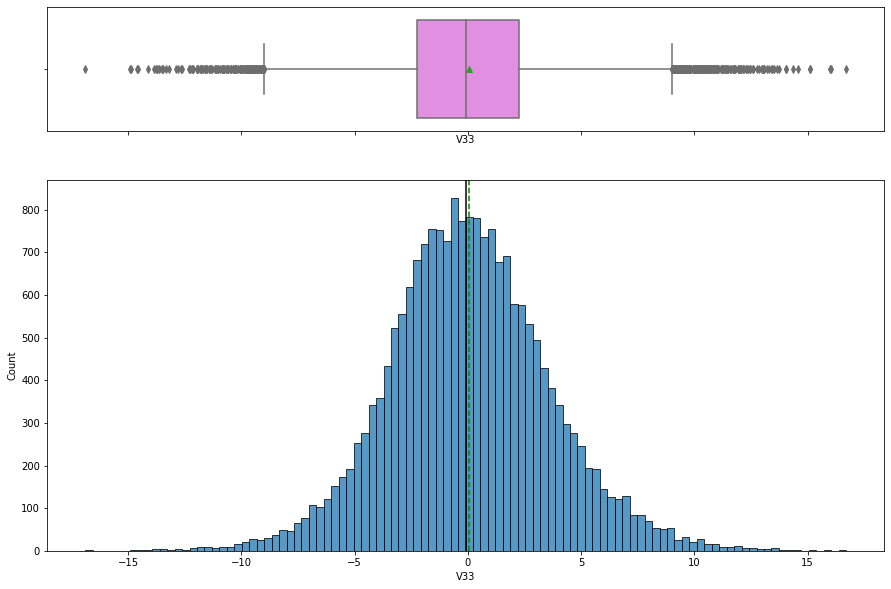

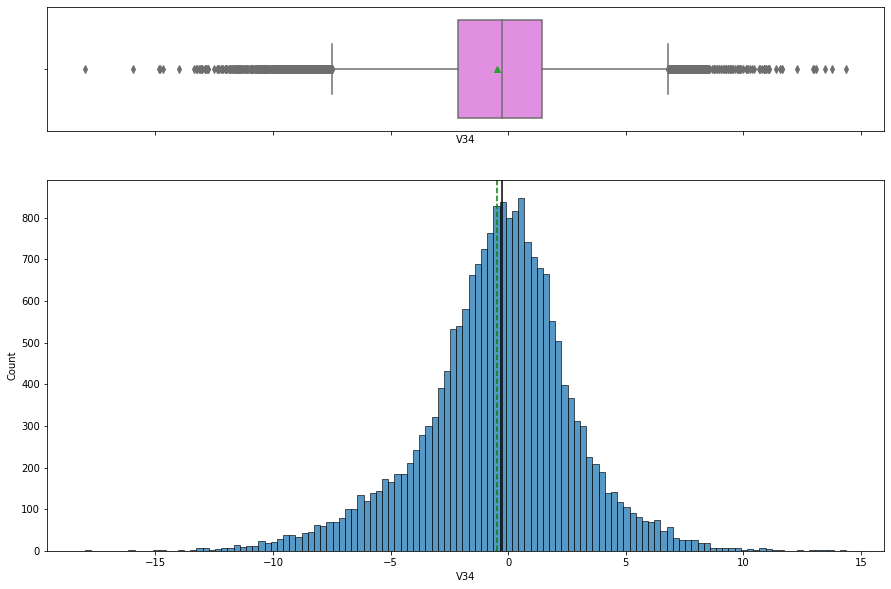

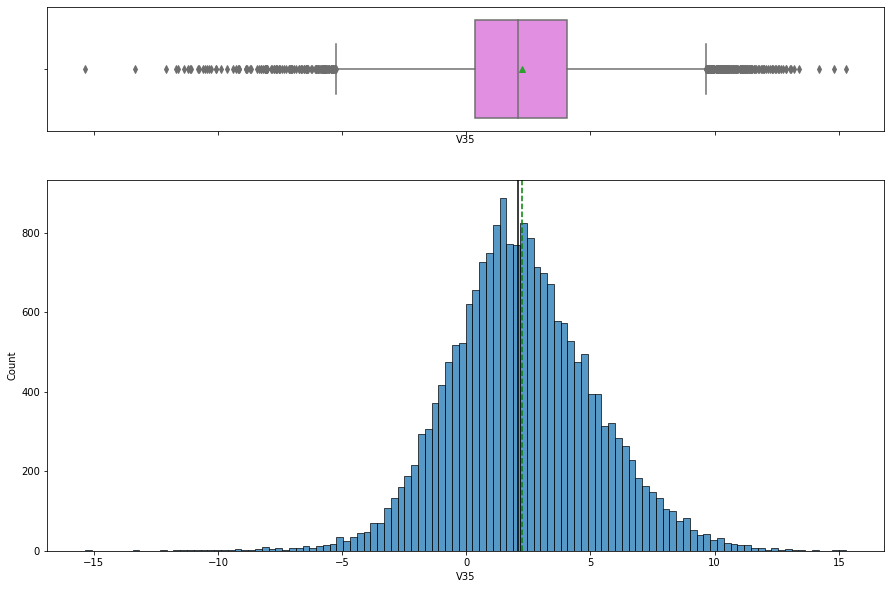

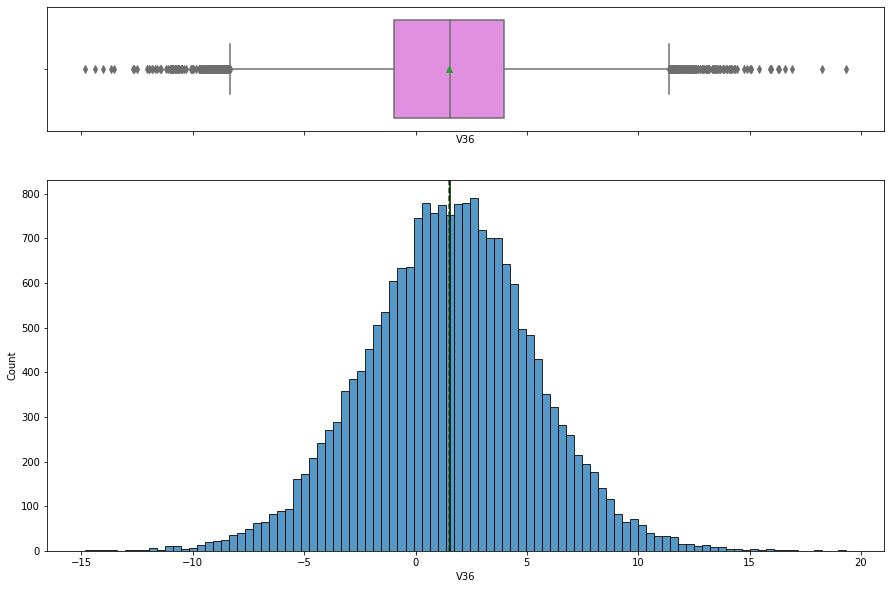

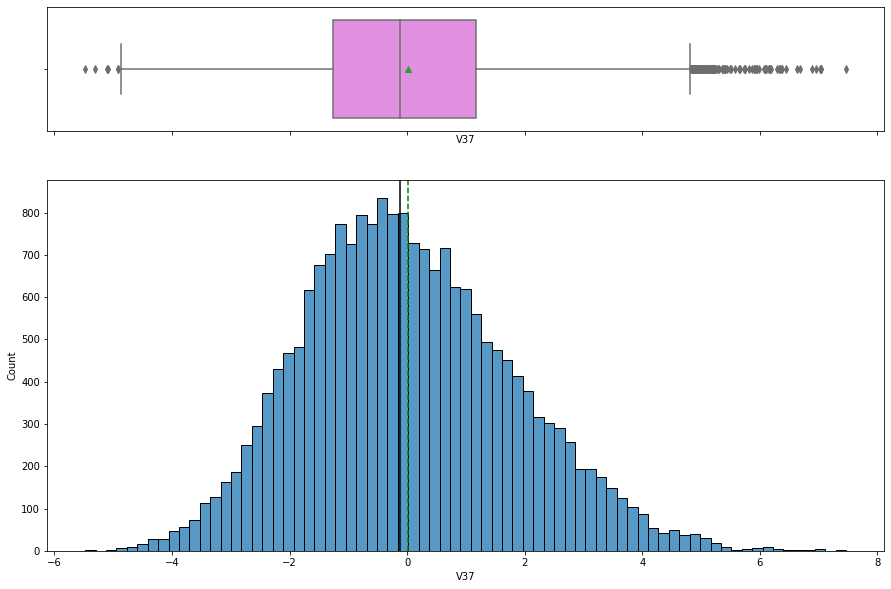

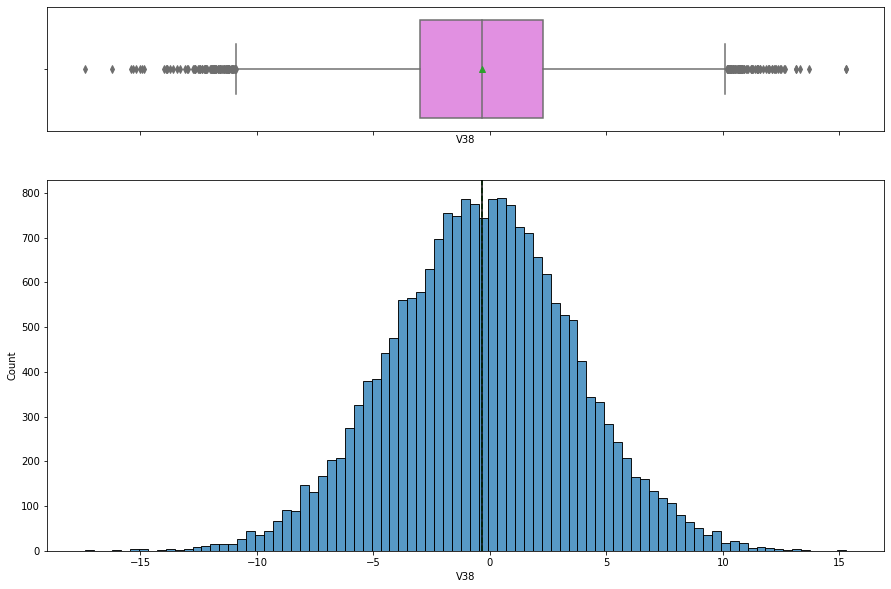

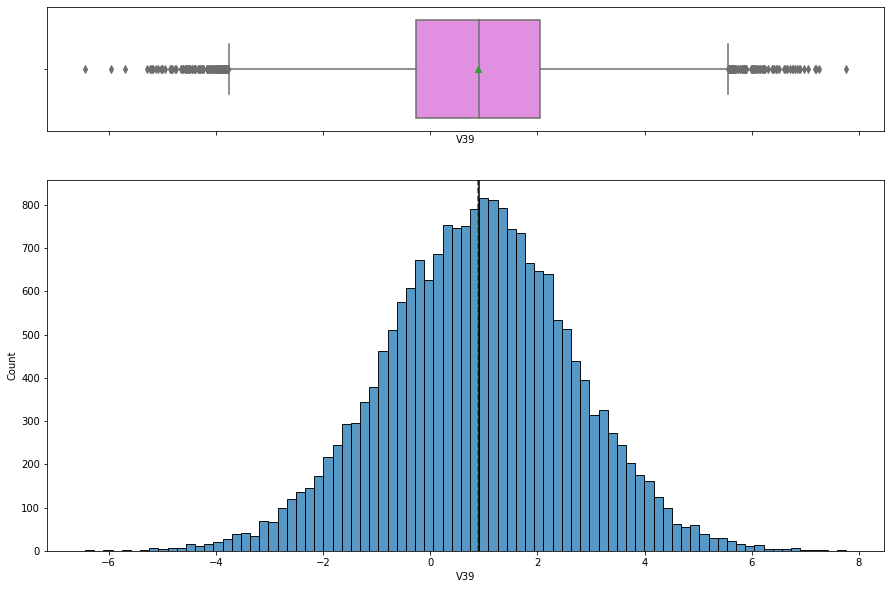

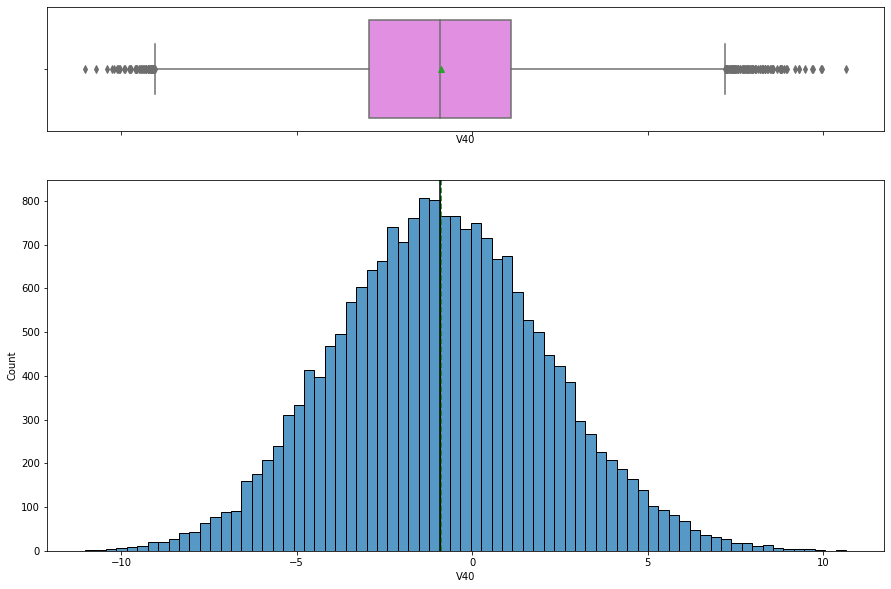

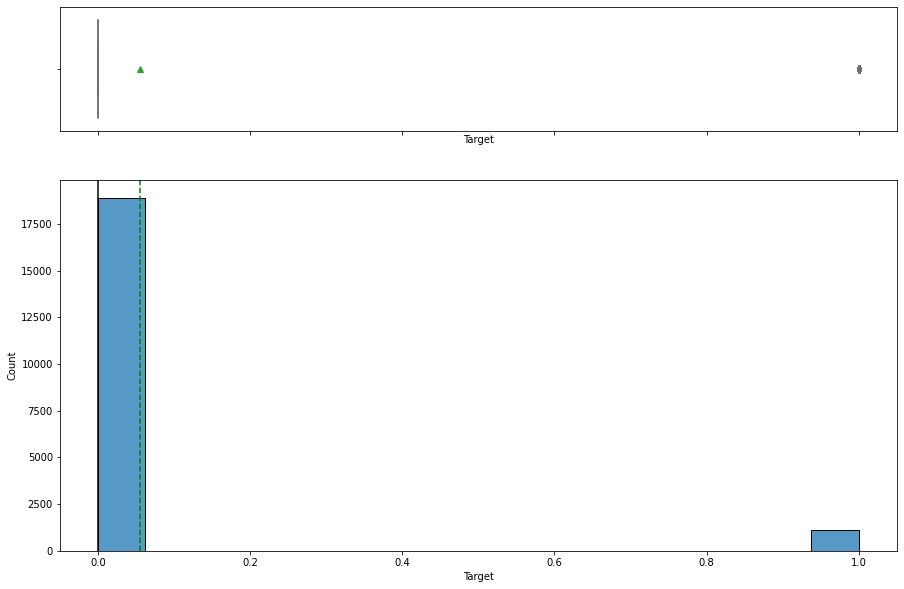

In [ ]:
for i in data.columns:
    histogram_boxplot(data, i, figsize=(15, 10), kde=False, bins=None)

* All independent features seem to have normal distributions.
* As seen in the statistical summary, all variables have outliers. The visualizations show those values on both sides of the distribution curve. 

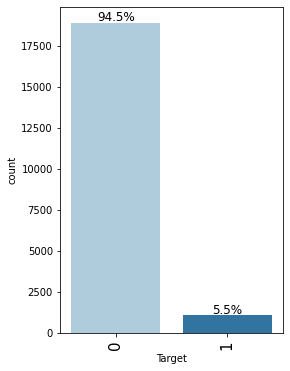

In [ ]:
labeled_barplot(data, 'Target', perc=True, n=None)

* Equipment failed in ~5% of instances.

### Bivariate analysis

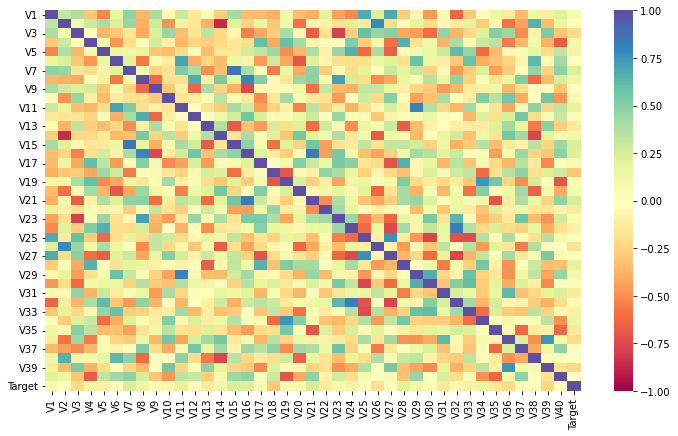

In [ ]:
# Visualizing correlations in the data
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=False, vmin=-1, vmax=1, annot_kws={'fontsize':4}, cmap="Spectral")
plt.show() # We hid annotations to favor color legibility

* We can see several possitive (blue) and negative (dark red) correlations between independent variables.
* For example, 'V7' and 'V15' are positively correlated. 'V2' and 'V14' are negatively correlated. 

## Data Pre-processing

In [ ]:
# Checking the distribution of the target variable
data['Target'].value_counts(1)

0   0.945
1   0.056
Name: Target, dtype: float64

Splitting the data into X and y

In [ ]:
# Separating the independent and dependent variables
X = data.drop(['Target'], axis=1)
y = data ['Target']

In [ ]:
# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 5, stratify = y)

print(X_train.shape, X_val.shape)

(14000, 40) (6000, 40)


## Missing value imputation




In [ ]:
# Checking the rows missing values
null_data = data[data.isnull().any(axis=1)]
print(null_data)

          V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
89       NaN -3.961  2.788 -4.713 -3.007 -1.541 -0.881  1.477  0.575 -1.101   
613   -2.049    NaN -1.624 -3.324  0.152  0.600 -1.813  0.852 -1.523  0.211   
2236  -3.761    NaN  0.195 -1.638  1.261 -1.574 -3.686  1.576 -0.310 -0.138   
2508  -1.431    NaN  0.660 -2.876  1.150 -0.786 -1.560  2.899 -2.347 -0.218   
4653   5.466    NaN  4.541 -2.917  0.400  2.799  0.029 -7.334  1.123  1.695   
5941     NaN  1.008  1.228  5.397  0.064 -2.707 -2.028  0.534  3.007 -2.362   
6317     NaN -5.205  1.998 -3.708 -1.042 -1.593 -2.653  0.852 -1.310  2.407   
6464     NaN  2.146  5.004  4.192  1.428 -6.438 -0.931  3.794 -0.683 -0.739   
6810  -2.631    NaN  2.330  1.090  0.604 -1.139 -0.690 -1.359  0.356 -1.189   
7073     NaN  2.534  2.763 -1.674 -1.942 -0.030  0.911 -3.200  2.949 -0.413   
7788  -4.203    NaN  2.954  0.584  4.104 -0.639 -2.811 -0.112 -1.363 -0.800   
8431     NaN -1.399 -2.008 -1.750  0.932 -1.290 -0.2

* We can see all null values are in 'V1' and 'V2' variables.
* We can't see a distinct pattern shared by the rows with missing values. 
* Let's impute them using the 'median' strategy.   

In [ ]:
# Imputing missing values
imp_median = SimpleImputer(missing_values = np.nan, strategy = 'median')

# Fit the imputer on train data and transform the train data
X_train['V1'] = imp_median.fit_transform(X_train[['V1']])
X_train['V2'] = imp_median.fit_transform(X_train[['V2']])

# Transforming the test data using the imputer fit
X_val['V1'] = imp_median.transform(X_val[['V1']])
X_val['V2'] = imp_median.transform(X_val[['V2']])

In [ ]:
# Checking there's no more NaN
X_val.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64

In [ ]:
# Checkin class balance for whole data, train set and validation set
print('Target value ratio in y')
print(y.value_counts(1))
print('*' * 80)
print('Target value ratio in y_train')
print(y_train.value_counts(1))
print('*' * 80)
print('Target value ratio in y_val')
print(y_val.value_counts(1))
print('*' * 80)

Target value ratio in y
0   0.945
1   0.056
Name: Target, dtype: float64
********************************************************************************
Target value ratio in y_train
0   0.945
1   0.056
Name: Target, dtype: float64
********************************************************************************
Target value ratio in y_val
0   0.945
1   0.056
Name: Target, dtype: float64
********************************************************************************


* Splitting the data has not modified class ratios between train and validation sets.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model. 
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
            
        },
        index=[0],
    )

    return df_perf

In [ ]:
#Defining a function to create a confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

### Sample Decision Tree model building with original data 

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("log_reg", LogisticRegression(random_state=1)))
models.append(("ada_boost", AdaBoostClassifier(random_state=1)))
models.append(("grad_boost", GradientBoostingClassifier(random_state=1)))
models.append(("rforest", RandomForestClassifier(random_state=1)))
models.append(("bagg_class", BaggingClassifier(random_state=1)))


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7155583126550868
log_reg: 0.48382961124896606
ada_boost: 0.6318775847808106
grad_boost: 0.715550041356493
rforest: 0.7193961952026469
bagg_class: 0.6833498759305211

Validation Performance:

dtree: 0.7237237237237237
log_reg: 0.5105105105105106
ada_boost: 0.6186186186186187
grad_boost: 0.7027027027027027
rforest: 0.7177177177177178
bagg_class: 0.6876876876876877


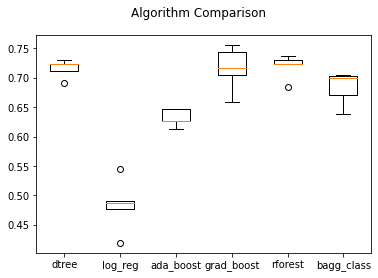

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

* Decision Tree, Gradient Boosting Classifier, Random Forest, and Bagging Classifier are the best models yet, barely passing the 70% mark.
* Logistic Regression is the worst performer. Its Recall score is even lower than chance. 

### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
# Comparing training data before and afer oversampling
print("Before OverSampling, count of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, count of label '0': {}\n".format(sum(y_train==0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over==1)))
print("After OverSampling, count of label '0': {}\n".format(sum(y_train_over==0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {}\n".format(y_train_over.shape))

Before OverSampling, count of label '1': 777
Before OverSampling, count of label '0': 13223

After OverSampling, count of label '1': 13223
After OverSampling, count of label '0': 13223

After OverSampling, the shape of train_X: (26446, 40)
After OverSampling, the shape of train_y: (26446,)



* After OverSampling, counts of the Target variable with failure label increased from 777 to 13223. 

In [ ]:
# To know the Cross-Validation performance with oversampled data

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset (oversampled):" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset (oversampled):

dtree: 0.97111096494113
log_reg: 0.8814191707014348
ada_boost: 0.899720507108151
grad_boost: 0.9259622099757199
rforest: 0.9832110939202503
bagg_class: 0.9734550961051737

Validation Performance:

dtree: 0.7777777777777778
log_reg: 0.8468468468468469
ada_boost: 0.8348348348348348
grad_boost: 0.8798798798798799
rforest: 0.8498498498498499
bagg_class: 0.7987987987987988


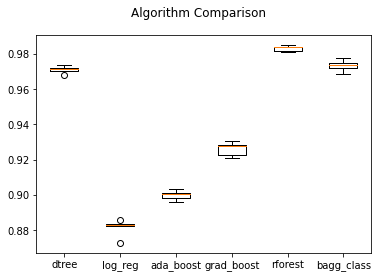

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results2)
ax.set_xticklabels(names)

plt.show()

* The performance for all models increased significantly with OverSampling. 
* Decision Tree, Random Forest, and Bagging Classifier are above the 95% mark.

### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
# Comparing training data before and afer oversampling
print("Before UnderSampling, count of label '1': {}".format(sum(y_train==1)))
print("Before UnderSampling, count of label '0': {}\n".format(sum(y_train==0)))

print("After UnderSampling, count of label '1': {}".format(sum(y_train_un==1)))
print("After UnderSampling, count of label '0': {}\n".format(sum(y_train_un==0)))

print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {}\n".format(y_train_un.shape))

Before UnderSampling, count of label '1': 777
Before UnderSampling, count of label '0': 13223

After UnderSampling, count of label '1': 777
After UnderSampling, count of label '0': 777

After UnderSampling, the shape of train_X: (1554, 40)
After UnderSampling, the shape of train_y: (1554,)



* After OverSampling, counts of the Target variable with non-failure label decreased from 13223 to 777. 

In [ ]:
# To know the Cross-Validation performance with undersampled data
results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset (undersampled):" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset (undersampled):

dtree: 0.8326799007444169
log_reg: 0.8649296939619522
ada_boost: 0.8829114971050455
grad_boost: 0.8893548387096775
rforest: 0.8944665012406947
bagg_class: 0.8725889164598841

Validation Performance:

dtree: 0.7777777777777778
log_reg: 0.8468468468468469
ada_boost: 0.8348348348348348
grad_boost: 0.8798798798798799
rforest: 0.8498498498498499
bagg_class: 0.7987987987987988


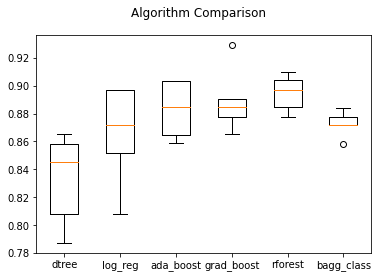

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results3)
ax.set_xticklabels(names)

plt.show()

* The performance also increased after UnderSampling, just not as impressively as with OverSampling. 

## HyperparameterTuning 

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7], 
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6), 
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Tuning method for Decision tree with original data

In [ ]:
# Defining the model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=10, n_jobs = -1, 
                                   scoring=scorer, cv=5, 
                                   random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.544449958643507:


In [ ]:
# Creating new model with best parameters
dtree_tuned1 = DecisionTreeClassifier(min_samples_leaf= 7, 
                                      min_impurity_decrease= 0.0001, 
                                      max_leaf_nodes= 15, 
                                      max_depth= 5)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [ ]:
# Calculating different metrics on train set
dtree_rand_train = model_performance_classification_sklearn(
    dtree_tuned1, X_train, y_train
)
print("Training performance:")
dtree_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.973,0.589,0.888,0.708


In [ ]:
# Calculating different metrics on validation set
dtree_rand_val = model_performance_classification_sklearn(dtree_tuned1, X_val, y_val)
print("Validation performance:")
dtree_rand_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.969,0.526,0.871,0.655


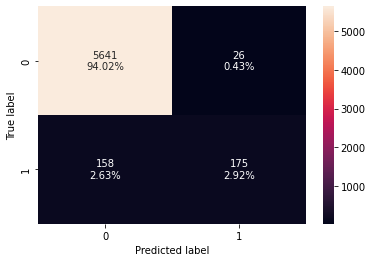

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn(dtree_tuned1, X_val, y_val)

* This model performs poorly in Recall Score. 



### Tuning method for Decision tree with oversampled data

In [ ]:
# Defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7], 
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 4, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.8775627808012721:


In [ ]:
# Creating new model with best parameters
dtree_tuned2 = DecisionTreeClassifier(min_samples_leaf= 4, 
                                      min_impurity_decrease= 0.0001, 
                                      max_leaf_nodes= 15, 
                                      max_depth= 4)

# Fit the model on training data
dtree_tuned2.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=4)

In [ ]:
# Calculating different metrics on train set
dtree_over_rand_train = model_performance_classification_sklearn(
    dtree_tuned2, X_train_over, y_train_over
)
print("Training performance:")
dtree_over_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.893,0.881,0.902,0.891


In [ ]:
# Calculating different metrics on train set
dtree_over_rand_val = model_performance_classification_sklearn(
    dtree_tuned2, X_val, y_val
)
print("Training performance:")
dtree_over_rand_val

Training performance:


,Accuracy,Recall,Precision,F1
0,0.897,0.838,0.330,0.474


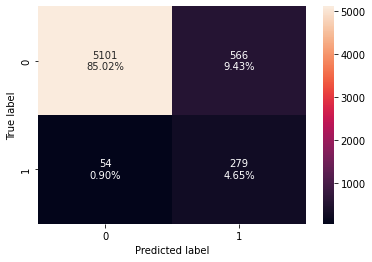

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn(dtree_tuned2, X_val, y_val)

* This model has an excellent Recall Score but performs poorly in Precision and F1 Score.

### Tuning method for Decision tree with undersampled data

In [ ]:
# Defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7], 
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=10, 
                                   n_jobs = -1, 
                                   scoring=scorer, 
                                   cv=5, 
                                   random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 14} with CV score=0.8300165425971878:


In [ ]:
# Creating new model with best parameters
dtree_tuned3 = DecisionTreeClassifier(min_samples_leaf= 1, 
                                      min_impurity_decrease= 0.001, 
                                      max_leaf_nodes= 5, 
                                      max_depth= 14)

# Fit the model on training data
dtree_tuned3.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=14, max_leaf_nodes=5,
                       min_impurity_decrease=0.001)

In [ ]:
# Calculating different metrics on train set
dtree_under_rand_train = model_performance_classification_sklearn(
    dtree_tuned3, X_train_un, y_train_un
)
print("Training performance:")
dtree_under_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.838,0.775,0.887,0.827


In [ ]:
# Calculating different metrics on train set
dtree_under_rand_val = model_performance_classification_sklearn(
    dtree_tuned3, X_val, y_val
)
print("Training performance:")
dtree_under_rand_val

Training performance:


,Accuracy,Recall,Precision,F1
0,0.884,0.763,0.293,0.423


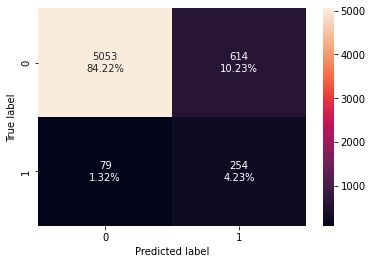

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn(dtree_tuned3, X_val, y_val)

* This model has a mid-tier Recall performance and a poor Precision and F1 Score.

### Tuning method for Random Forest Classifier with original data

In [ ]:
# Defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300], 
              "min_samples_leaf": np.arange(1, 4), 
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
              "max_samples": np.arange(0.4, 0.7, 0.1) 
              }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=10, n_jobs = -1, 
                                   scoring=scorer, cv=5, 
                                   random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7001571546732839:


In [ ]:
# Creating new model with best parameters
rforest_tuned1 = RandomForestClassifier(n_estimators= 250, 
                                        min_samples_leaf= 1, 
                                        max_samples= 0.6, 
                                        max_features= 'sqrt')

# Fit the model on training data
rforest_tuned1.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250)

In [ ]:
# Calculating different metrics on train set
rforest_rand_train = model_performance_classification_sklearn(
    rforest_tuned1, X_train, y_train
)
print("Training performance:")
dtree_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.973,0.589,0.888,0.708


In [ ]:
# Calculating different metrics on validation set
rforest_rand_val = model_performance_classification_sklearn(
    rforest_tuned1, X_val, y_val
)
print("Training performance:")
dtree_rand_val

Training performance:


,Accuracy,Recall,Precision,F1
0,0.969,0.526,0.871,0.655


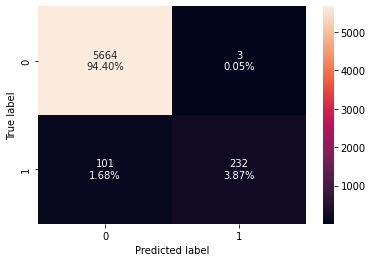

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn(rforest_tuned1, X_val, y_val)

* This model has a poor Recall Score. 

### Tuning method for Random Forest Classifier with oversampled data

In [ ]:
# Defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300], 
              "min_samples_leaf": np.arange(1, 4), 
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
              "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9796561319419222:


In [ ]:
# Creating new model with best parameters
rforest_tuned2 = RandomForestClassifier(n_estimators= 250, min_samples_leaf= 1, max_samples= 0.6, max_features= 'sqrt')

# Fit the model on training data
rforest_tuned2.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=250)

In [ ]:
# Calculating different metrics on train set
rforest_over_rand_train = model_performance_classification_sklearn(
    rforest_tuned2, X_train_over, y_train_over
)
print("Training performance:")
rforest_over_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999,0.999,1.000,0.999


In [ ]:
# Calculating different metrics on train set
rforest_over_rand_val = model_performance_classification_sklearn(
    rforest_tuned2, X_val, y_val
)
print("Training performance:")
rforest_over_rand_val

Training performance:


,Accuracy,Recall,Precision,F1
0,0.988,0.853,0.925,0.887


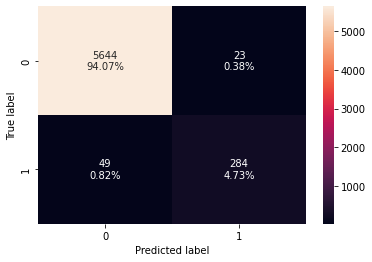

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn(rforest_tuned2, X_val, y_val)

* This model has a pretty good overall performance, even though it seems to be overfitted.

### Tuning method for Random Forest Classifier with undersampled data

In [ ]:
# Defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300], 
              "min_samples_leaf": np.arange(1, 4), 
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
              "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=10, n_jobs = -1, 
                                   scoring=scorer, cv=5, 
                                   random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8983209263854425:


In [ ]:
# Creating new model with best parameters
rforest_tuned3 = RandomForestClassifier(n_estimators= 300, 
                                        min_samples_leaf= 1, 
                                        max_samples= 0.6, 
                                        max_features= 'sqrt')

# Fit the model on training data
rforest_tuned3.fit(X_train_un, y_train_un)

RandomForestClassifier(max_features='sqrt', max_samples=0.6, n_estimators=300)

In [ ]:
# Calculating different metrics on train set
rforest_under_rand_train = model_performance_classification_sklearn(
    rforest_tuned3, X_train_un, y_train_un
)
print("Training performance:")
rforest_under_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.988,0.977,1.000,0.988


In [ ]:
# Calculating different metrics on validation set
rforest_under_rand_val = model_performance_classification_sklearn(
    rforest_tuned3, X_val, y_val
)
print("Training performance:")
rforest_under_rand_val

Training performance:


,Accuracy,Recall,Precision,F1
0,0.946,0.895,0.505,0.646


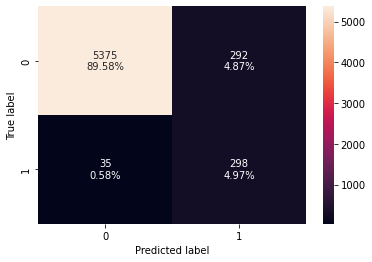

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn(rforest_tuned3, X_val, y_val)

* This model shows an inconsistent performance. 

### Tuning method for Logistic Regression with original data

In [ ]:
# Defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=10, 
                                   n_jobs = -1, 
                                   scoring=scorer, 
                                   cv=5, 
                                   random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.2} with CV score=0.48912324234904886:


In [ ]:
# Creating new pipeline with best parameters
lr_tuned1 = LogisticRegression(C= 0.2)

# Fit the model on training data
lr_tuned1.fit(X_train, y_train)

LogisticRegression(C=0.2)

In [ ]:
# Calculating different metrics on train set
lr_rand_train = model_performance_classification_sklearn(
    lr_tuned1, X_train, y_train
)
print("Training performance:")
lr_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.967,0.488,0.861,0.623


In [ ]:
# Calculating different metrics on validation set
lr_rand_val = model_performance_classification_sklearn(
    lr_tuned1, X_val, y_val
)
print("Training performance:")
lr_rand_val

Training performance:


,Accuracy,Recall,Precision,F1
0,0.968,0.511,0.859,0.640


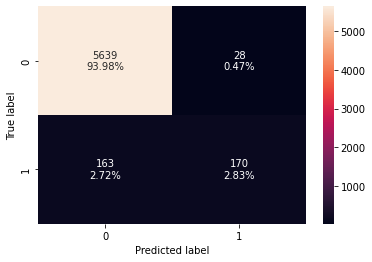

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn(lr_tuned1, X_val, y_val)

* Tuned Logistic Regression has a poor Recall performance.

### Tuning method for Logistic Regression with oversampled data

In [ ]:
# Defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=10, 
                                   n_jobs = -1, 
                                   scoring=scorer, 
                                   cv=5, 
                                   random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.1} with CV score=0.8817972425350831:


In [ ]:
# Creating new pipeline with best parameters
lr_tuned2 = LogisticRegression(C= 0.1)

# Fit the model on training data
lr_tuned2.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1)

In [ ]:
# Calculating different metrics on train set
lr_over_rand_train = model_performance_classification_sklearn(
    lr_tuned2, X_train_over, y_train_over
)
print("Training performance:")
lr_over_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.880,0.881,0.878,0.880


In [ ]:
# Calculating different metrics on validation set
lr_over_rand_val = model_performance_classification_sklearn(
    lr_tuned2, X_val, y_val
)
print("Training performance:")
lr_over_rand_val

Training performance:


,Accuracy,Recall,Precision,F1
0,0.871,0.847,0.280,0.421


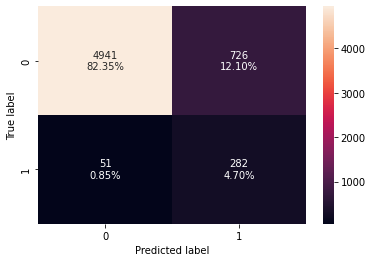

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn(lr_tuned2, X_val, y_val)

* Recall performance increased with oversampled data, but the model also throws poor Precision and F1 Score. 

### Tuning method for Logistic Regression with undersampled data

In [ ]:
# Defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=10, 
                                   n_jobs = -1, 
                                   scoring=scorer, 
                                   cv=5, 
                                   random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.30000000000000004} with CV score=0.8609925558312655:


In [ ]:
# Creating new pipeline with best parameters
lr_tuned3 = LogisticRegression(C= 0.30000000000000004)

# Fit the model on training data
lr_tuned3.fit(X_train_un, y_train_un)

LogisticRegression(C=0.30000000000000004)

In [ ]:
# Calculating different metrics on train set
lr_under_rand_train = model_performance_classification_sklearn(
    lr_tuned3, X_train_un, y_train_un
)
print("Training performance:")
lr_under_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.866,0.864,0.868,0.866


In [ ]:
# Calculating different metrics on validation set
lr_under_rand_val = model_performance_classification_sklearn(
    lr_tuned3, X_val, y_val
)
print("Training performance:")
lr_under_rand_val

Training performance:


,Accuracy,Recall,Precision,F1
0,0.857,0.859,0.260,0.400


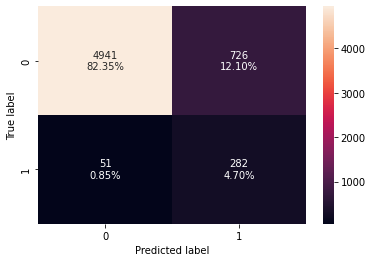

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn(lr_tuned2, X_val, y_val)

* Same kind of performance: good Recall, poor Precision, and F1 Score.

### Tuning method for Gradient Boost with original data

In [ ]:
# Defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25), 
              "learning_rate": [0.2, 0.05, 1], 
              "subsample":[0.5,0.7], 
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=10, n_jobs = -1, 
                                   scoring=scorer, 
                                   cv=5, 
                                   random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.7554921422663359:


In [ ]:
# Creating new model with best parameters
GBoost_tuned1 = GradientBoostingClassifier(subsample= 0.7, 
                                           n_estimators= 125, 
                                           max_features= 0.5, 
                                           learning_rate= 0.2)

# Fit the model on training data
GBoost_tuned1.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.7)

In [ ]:
# Calculating different metrics on train set
GBoost_rand_train = model_performance_classification_sklearn(
    GBoost_tuned1, X_train, y_train
)
print("Training performance:")
GBoost_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.994,0.906,0.982,0.942


In [ ]:
# Calculating different metrics on validation set
GBoost_rand_val = model_performance_classification_sklearn(
    GBoost_tuned1, X_val, y_val
)
print("Training performance:")
GBoost_rand_val

Training performance:


,Accuracy,Recall,Precision,F1
0,0.978,0.715,0.865,0.783


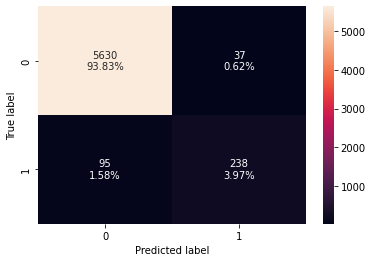

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn(GBoost_tuned1, X_val, y_val)

* This model gives us a mediocre Recall.

### Tuning method for Gradient Boost with oversampled data

In [ ]:
# Defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25), 
              "learning_rate": [0.2, 0.05, 1], 
              "subsample":[0.5,0.7], 
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=10, n_jobs = -1, 
                                   scoring=scorer, 
                                   cv=5, 
                                   random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9626409547314747:


In [ ]:
# Creating new model with best parameters
GBoost_tuned2 = GradientBoostingClassifier(subsample= 0.7, 
                                           n_estimators= 125, 
                                           max_features= 0.5, 
                                           learning_rate= 1)

# Fit the model on training data
GBoost_tuned2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           subsample=0.7)

In [ ]:
# Calculating different metrics on train set
GBoost_over_rand_train = model_performance_classification_sklearn(
    GBoost_tuned2, X_train_over, y_train_over
)
print("Training performance:")
GBoost_over_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.970,0.970,0.970,0.970


In [ ]:
# Calculating different metrics on validation set
GBoost_over_rand_val = model_performance_classification_sklearn(
    GBoost_tuned2, X_val, y_val
)
print("Training performance:")
GBoost_over_rand_val

Training performance:


,Accuracy,Recall,Precision,F1
0,0.950,0.859,0.532,0.657


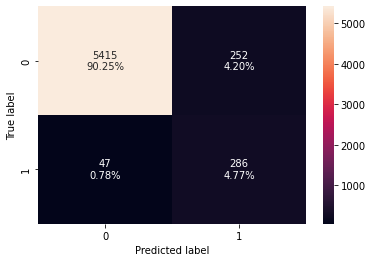

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn(GBoost_tuned2, X_val, y_val)

* As with other models, this one gives us a good Recall but insufficient Precision and F1 Score.

### Tuning method for Gradient Boost with undersampled data

In [ ]:
# Defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25), 
              "learning_rate": [0.2, 0.05, 1], 
              "subsample":[0.5,0.7], 
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, 
                                   param_distributions=param_grid, 
                                   n_iter=10, n_jobs = -1, 
                                   scoring=scorer, cv=5, 
                                   random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.2} with CV score=0.9008767576509513:


In [ ]:
# Creating new model with best parameters
GBoost_tuned3 = GradientBoostingClassifier(subsample= 0.5, 
                                           n_estimators= 100, 
                                           max_features= 0.7, 
                                           learning_rate= 0.2)

# Fit the model on training data
GBoost_tuned3.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.7, subsample=0.5)

In [ ]:
# Calculating different metrics on train set
GBoost_under_rand_train = model_performance_classification_sklearn(
    GBoost_tuned3, X_train_un, y_train_un
)
print("Training performance:")
GBoost_under_rand_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.987,0.978,0.996,0.987


In [ ]:
# Calculating different metrics on validation set
GBoost_under_rand_val = model_performance_classification_sklearn(
    GBoost_tuned3, X_val, y_val
)
print("Training performance:")
GBoost_under_rand_val

Training performance:


,Accuracy,Recall,Precision,F1
0,0.918,0.883,0.394,0.544


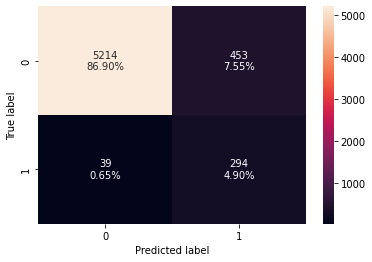

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn(GBoost_tuned3, X_val, y_val)

* Same phenomenon: good Recall, inadequate Precision, an F1 Score.

## Model performance comparison and choosing the final model

In [ ]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_rand_train.T,
        dtree_over_rand_train.T,
        dtree_under_rand_train.T,
        rforest_rand_train.T,
        rforest_over_rand_train.T,
        rforest_under_rand_train.T,
        lr_rand_train.T,
        lr_over_rand_train.T,
        lr_under_rand_train.T,
        GBoost_rand_train.T,
        GBoost_over_rand_train.T,
        GBoost_under_rand_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Tuned with Random Search",
    "Decision Tree Tuned with Random Search oversampled",
    "Decision Tree Tuned with Random Search undersampled",
    "Random Forest Tuned with Random Search",
    "Random Forest Tuned with Random Search oversampled",
    "Random Forest Tuned with Random Search undersampled",
    "Logistic Regression Tuned with Random search",
    "Logistic Regression with Random Search oversampled",
    "Logistic Regression with Random Search undersampled",
    "Gradient Boost Tuned with Random Search",
    "Gradient Boost with Random Search oversampled",
    "Gradient Boost with Random Search undersampled",    
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Tuned with Random Search,Decision Tree Tuned with Random Search oversampled,Decision Tree Tuned with Random Search undersampled,Random Forest Tuned with Random Search,Random Forest Tuned with Random Search oversampled,Random Forest Tuned with Random Search undersampled,Logistic Regression Tuned with Random search,Logistic Regression with Random Search oversampled,Logistic Regression with Random Search undersampled,Gradient Boost Tuned with Random Search,Gradient Boost with Random Search oversampled,Gradient Boost with Random Search undersampled
Accuracy,0.973,0.893,0.838,0.995,0.999,0.988,0.967,0.880,0.866,0.994,0.970,0.987
Recall,0.589,0.881,0.775,0.903,0.999,0.977,0.488,0.881,0.864,0.906,0.970,0.978
Precision,0.888,0.902,0.887,0.999,1.000,1.000,0.861,0.878,0.868,0.982,0.970,0.996
F1,0.708,0.891,0.827,0.949,0.999,0.988,0.623,0.880,0.866,0.942,0.970,0.987


In [ ]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        dtree_rand_val.T,
        dtree_over_rand_val.T,
        dtree_under_rand_val.T,
        rforest_rand_val.T,
        rforest_over_rand_val.T,
        rforest_under_rand_val.T,
        lr_rand_val.T,
        lr_over_rand_val.T,
        lr_under_rand_val.T,
        GBoost_rand_val.T,
        GBoost_over_rand_val.T,
        GBoost_under_rand_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Decision Tree Tuned with Random search",
    "Decision Tree Tuned with Random search oversampled",
    "Decision Tree Tuned with Random search undersampled",
    "Random Forest Tuned with Random search",
    "Random Forest Tuned with Random search oversampled",
    "Random Forest Tuned with Random search undersampled",
    "Logistic Regression Tuned with Random search",
    "Logistic Regression with Random search oversampled",
    "Logistic Regression with Random search undersampled",
    "Gradient Boost Tuned with Random search",
    "Gradient Boost with Random search oversampled",
    "Gradient Boost with Random search undersampled",    
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Decision Tree Tuned with Random search,Decision Tree Tuned with Random search oversampled,Decision Tree Tuned with Random search undersampled,Random Forest Tuned with Random search,Random Forest Tuned with Random search oversampled,Random Forest Tuned with Random search undersampled,Logistic Regression Tuned with Random search,Logistic Regression with Random search oversampled,Logistic Regression with Random search undersampled,Gradient Boost Tuned with Random search,Gradient Boost with Random search oversampled,Gradient Boost with Random search undersampled
Accuracy,0.969,0.897,0.884,0.983,0.988,0.946,0.968,0.871,0.857,0.978,0.950,0.918
Recall,0.526,0.838,0.763,0.697,0.853,0.895,0.511,0.847,0.859,0.715,0.859,0.883
Precision,0.871,0.330,0.293,0.987,0.925,0.505,0.859,0.280,0.260,0.865,0.532,0.394
F1,0.655,0.474,0.423,0.817,0.887,0.646,0.640,0.421,0.400,0.783,0.657,0.544


* **Random Forest Tuned with Random search oversampled is the best overall performer.**
* Random Forest undersampled had a higher Recall score, but Precision and F1 dropped. 

**Feature importance**

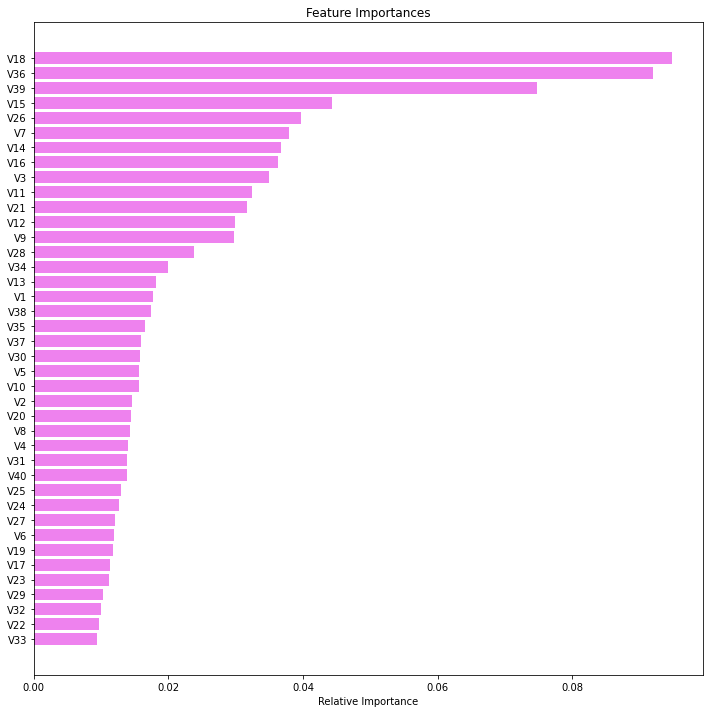

In [ ]:
# Visualizing the feature importance
feature_names = X_train.columns
importances = rforest_tuned2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* 'V18' and 'V36' are the most significant variables, with a relative importance of ∼10% each.
* 'V39' is the third most essential predictor of failure (∼8%). 
* The following more prominent variable, 'V15', has less than 5% importance. 

### Test set final performance

In [ ]:
# Separating the independent and dependent variables in the test set
X_test = test.drop(['Target'], axis=1)
y_test = test ['Target']

In [ ]:
# Fit the imputer on test data and transform the test data
X_test['V1'] = imp_median.fit_transform(X_test[['V1']])
X_test['V2'] = imp_median.fit_transform(X_test[['V2']])

In [ ]:
# Calculating different metrics on test set
rforest_over_rand_test = model_performance_classification_sklearn(
    rforest_tuned2, X_test, y_test
)
print("Training performance:")
rforest_over_rand_test

Training performance:


,Accuracy,Recall,Precision,F1
0,0.988,0.848,0.926,0.885


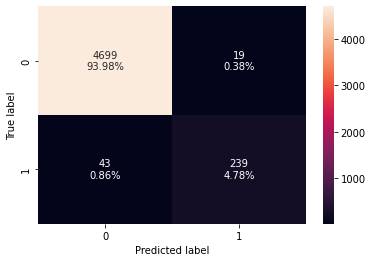

In [ ]:
# Creating confusion matrix
confusion_matrix_sklearn(rforest_tuned2, X_test, y_test)

In [ ]:
# Final validation performance comparison for the chosen model

rforest_final_comp = pd.concat(
    [   rforest_over_rand_train.T,
        rforest_over_rand_val.T,
        rforest_over_rand_test.T
    ],
    axis=1,
)
rforest_final_comp.columns = [
    "Best Random Forest in training",
    "Best Random Forest in validation",
    "Best Random Forest in test"]

rforest_final_comp

,Best Random Forest in training,Best Random Forest in validation,Best Random Forest in test
Accuracy,0.999,0.988,0.988
Recall,0.999,0.853,0.848
Precision,1.000,0.925,0.926
F1,0.999,0.887,0.885


* Good news! Our model performs very well with training data. 
* Its values are very close to those in the validation set.

## Pipelines to build the final model


In [ ]:
# Creating a list of imputable variables
imput_cols = ['V1', 'V2']

#Creating a transformer for imputable variables
imputer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

preprocessor= ColumnTransformer(
    transformers=[
        ('nan', imputer, imput_cols),
    ],
    remainder= 'passthrough',
)

# Creating the pipeline for the model
model_pipe = Pipeline(steps=[('pre', preprocessor), ('model', rforest_tuned2)])

In [ ]:
#Splitting the X and y variables again to train and fit the pipeline
X_pipes = data.drop(["Target"], axis=1)
y_pipes = data["Target"]


In [ ]:
# Imputing the X and y variables in the new training data
X_pipes['V1'] = imp_median.fit_transform(X_pipes[['V1']])
X_pipes['V2'] = imp_median.fit_transform(X_pipes[['V2']])

In [ ]:
# Oversampling the new training data with SMOTE
X_over_pipes, y_over_pipes = sm.fit_resample(X_pipes, y_pipes)

In [ ]:
model_pipe.fit(X_over_pipes, y_over_pipes)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('nan',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['V1', 'V2'])])),
                ('model',
                 RandomForestClassifier(max_features='sqrt', max_samples=0.6,
                                        n_estimators=250))])

In [ ]:
# Checking the performance on the test set
model_test = model_performance_classification_sklearn(model_pipe, X_test, y_test)
model_test

,Accuracy,Recall,Precision,F1
0,0.988,0.844,0.933,0.886


* Now, our model is standardized in a pipeline.  

# Business Insights and Conclusions

* We have been able to build a predictive model:  

> a)   that ReneWind can use to replace components before failure,

> b) that will reduce the waste of resources in unnecessary component replacements, 

> c) that the company can use to create an evidence-based program to optimize periodic maintenance operations, and 

> d) based on which the Financial Department can better forecast part of the company's production costs.
 
* Based on our analysis, we identified the drivers that significantly influence failures in wind power generators:
  - 'V18' and 'V36' are the most significant variables, with a relative importance of ∼10% each.
  - 'V39' is the third most essential predictor of failure (∼8%). 
  - Note that our heatmap shows this variable is positively correlated with 'V36'. Though 'V19' is a low-importance variable, it appears to be negatively correlated to 'V18', a high-importance variable.
  - The fourth more prominent variable, 'V15', is less than 5% important.
  - Nine other variables influence failures in a relative weight between ∼3% and ∼4% each.
  - The remaining 27 variables hold importance between ∼1% and ∼2.5%.

* We recommend that ReneWind closely monitor the most significant variables according to the model and proactively base its periodic maintenance program on them.
* We standardized the model in a pipeline for a simple and consistent performance with future data. 
* Please note that we created this model with an oversampling technique. This process is absent in the final pipeline. The same method should be used in the training data if the company wants to refit this particular model.